
# 📊 STA211 - EDA & Prétraitement des Données

# 1. Introdcution <a id="1-introduction"></a>

Ce notebook réalise l’analyse exploratoire des données (EDA) et le prétraitement du dataset **Internet Advertisements** dans le cadre du module **STA211**. L’objectif est de prédire si une image est une publicité (`ad.`) ou non (`noad.`), en optimisant le **score F1** sur un jeu de test.

---

## 🔍 Objectifs :
- **Explorer les caractéristiques du dataset**
  - Dimensions des données (2459 lignes d’entraînement, 820 lignes de test, 1558 variables explicatives).
  - Types de variables : 3 quantitatives (géométrie des images) et 1555 binaires (mots-clés, URL, etc.).
  - Distribution des classes : analyse du déséquilibre (13.99% `ad.` vs 86.01% `noad.`).

- **Analyser la qualité des données**
  - Identifier et imputer les valeurs manquantes (MCAR, MAR, MNAR).
  - Détecter et traiter les valeurs aberrantes (outliers).
  - Vérifier la cohérence des données (types, valeurs inattendues).

- **Analyser les relations entre variables**
  - Distributions univariées (histogrammes, box-plots, QQ-plots).
  - Corrélations bivariées et multivariées (ACP, AFM, cartes de Kohonen).
  - Identification des mots-clés les plus discriminants pour la classe `ad.`.

- **Prétraiter les données pour la modélisation**
  - Encodage de la variable cible (`ad.`/`noad.` → 1/0).
  - Transformation des variables quantitatives (Yeo-Johnson, discrétisation).
  - Gestion du déséquilibre via SMOTE ou pondération des classes.
  - Séparation train/test stratifiée (80-20) pour validation.

---

# Définition des métadonnées du projet

**Objectif** : Définir les métadonnées du projet pour assurer la traçabilité et la reproductibilité du notebook. Ces informations identifient le projet, l’auteur, la version, et la période de réalisation.

**Contexte** : Dans le cadre du challenge *Internet Advertisements*, ces métadonnées servent à documenter le travail réalisé pour la classification binaire (`ad.` vs `noad.`) et à faciliter l’évaluation pédagogique.

**Méthodologie** : Les métadonnées sont stockées dans des variables globales et affichées pour confirmation. Une date dynamique est utilisée pour refléter le moment de l’exécution.

**Prochaines étapes** : Configurer l’environnement et charger les données (section suivante).

In [34]:
## Définition des métadonnées du projet

import json
from datetime import datetime
from pathlib import Path

# ============================================================================
# MÉTADONNÉES DU PROJET STA211
# ============================================================================

# Métadonnées principales
PROJECT_NAME = "STA211: Internet Advertisements Classification"
DATASET_NAME = "Internet Advertisements Dataset"
AUTHOR = "Abdoullatuf"
DATE = datetime.now().strftime("%Y-%m-%d %H:%M")
VERSION = "1.1"

# Métadonnées techniques du projet
PROJECT_METADATA = {
    "project_info": {
        "name": PROJECT_NAME,
        "dataset": DATASET_NAME,
        "author": AUTHOR,
        "date": DATE,
        "version": VERSION,
        "course": "STA211 - CNAM Master 2 Data Science"
    },
    "dataset_specs": {
        "train_samples": 2459,
        "test_samples": 820,
        "total_features": 1558,
        "continuous_features": 3,
        "binary_features": 1555,
        "target_variable": "y (ad./noad.)",
        "class_imbalance": "13.99% ad. vs 86.01% noad."
    },
    "objectives": [
        "Optimisation du F1-score",
        "Gestion du déséquilibre des classes",
        "Imputation robuste (MICE/KNN)",
        "Réduction de la colinéarité",
        "Pipeline modulaire et reproductible"
    ]
}

# Validation et affichage
def validate_metadata(metadata_dict):
    """Valide la structure des métadonnées."""
    required_sections = ["project_info", "dataset_specs", "objectives"]

    for section in required_sections:
        if section not in metadata_dict:
            raise KeyError(f"Section manquante dans les métadonnées : {section}")

    return True

# Validation
validate_metadata(PROJECT_METADATA)

# Affichage structuré
print("🎯 " + "="*60)
print(f"📊 {PROJECT_NAME}")
print("🎯 " + "="*60)

# Informations projet
project_info = PROJECT_METADATA["project_info"]
print(f"👤 Auteur      : {project_info['author']}")
print(f"📅 Date       : {project_info['date']}")
print(f"🔢 Version    : {project_info['version']}")
print(f"🎓 Cours      : {project_info['course']}")
print(f"📁 Dataset    : {project_info['dataset']}")

# Spécifications dataset
print(f"\n📊 Caractéristiques des données :")
dataset_specs = PROJECT_METADATA["dataset_specs"]
for key, value in dataset_specs.items():
    formatted_key = key.replace('_', ' ').title()
    print(f"   • {formatted_key}: {value}")

# Objectifs
print(f"\n🎯 Objectifs techniques :")
for i, objective in enumerate(PROJECT_METADATA["objectives"], 1):
    print(f"   {i}. {objective}")

print(f"\n🚀 Environnement initialisé - Prêt pour l'analyse des données")

🎯 ============================================================
📊 STA211: Internet Advertisements Classification
🎯 ============================================================
👤 Auteur      : Abdoullatuf
📅 Date       : 2025-06-09 16:31
🔢 Version    : 1.1
🎓 Cours      : STA211 - CNAM Master 2 Data Science
📁 Dataset    : Internet Advertisements Dataset

📊 Caractéristiques des données :
   • Train Samples: 2459
   • Test Samples: 820
   • Total Features: 1558
   • Continuous Features: 3
   • Binary Features: 1555
   • Target Variable: y (ad./noad.)
   • Class Imbalance: 13.99% ad. vs 86.01% noad.

🎯 Objectifs techniques :
   1. Optimisation du F1-score
   2. Gestion du déséquilibre des classes
   3. Imputation robuste (MICE/KNN)
   4. Réduction de la colinéarité
   5. Pipeline modulaire et reproductible

🚀 Environnement initialisé - Prêt pour l'analyse des données


# 📚 Table des matières

## 🔍 Structure du notebook STA211

1. [Introduction](#introduction)
2. [Configuration de l'environnement et imports](#configuration-environnement-imports)
    - 2.1 [Configuration de l'environnement](#configuration-environnement)
    - 2.2 [Import des bibliothèques](#import-des-bibliotheques)
    - 2.3 [Configuration des paramètres du projet](#configuration-parametres-projet)
3. [Chargement et aperçu des données](#chargement-et-apercu-des-donnees)
    - 3.1 [Chargement des jeux de données bruts](#chargement-des-jeux-de-donnees-bruts)
    - 3.2 [Inspection des colonnes et types](#inspection-des-colonnes-et-types)
    - 3.3 [Distribution de la variable cible](#distribution-variable-cible)
4. [Analyse exploratoire](#analyse-exploratoire)
    - 4.1 [Analyse des valeurs manquantes](#analyse-des-valeurs-manquantes)
    - 4.2 [Analyse statistique des variables quantitatives](#analyse-statistique-des-variables-quantitatives)
    - 4.3 [Visualisation des distributions et des boxplots](#distributions-et-boxplots)
    - 4.4 [Distribution des variables binaires](#distribution-des-variables-binaires)
    - 4.5 [Analyse des corrélations combinées](#analyse-correlations-combinees)
    - 4.6 [Visualisations globales de l'EDA](#visualisation-globale)
5. [Prétraitement avancé](#pretraitement-avance)
    - 5.1 [Transformation Yeo-Johnson sur X1, X2, X3](#transformation-yeo-johnson)
    - 5.2 [Détection et suppression des outliers](#detection-et-suppression-des-outliers)
    - 5.3 [Gestion des valeurs manquantes](#gestion-des-valeurs-manquantes)
        - 5.3.1 [Imputation de X4 par la médiane](#imputation-x4-mediane)
        - 5.3.2 [Préparation pour l'imputation multivariée](#preparation-imputation-multivariee)
        - 5.3.3 [Imputation multivariée (MICE)](#imputation-multivariee-mice)
        - 5.3.4 [Imputation par KNN](#imputation-knn)
    - 5.4 [Détection et traitement des variables collinéaires](#detection-et-traitement-des-variables-collineaires)
6. [Prétraitement et génération des datasets](#pretraitement-generation-datasets)
    - 6.1 [Construction des datasets finaux](#construction-des-datasets-finaux) ⭐
    - 6.2 [Comparaison des méthodes d'imputation](#comparaison-methodes) 🚧
    - 6.3 [Diagnostic automatisé des données](#diagnostic-donnees)
7. [Modélisation et validation](#modelisation-validation) 🚧
    - 7.1 [Comparaison des performances par méthode](#comparaison-performances)
    - 7.2 [Sélection du meilleur preprocessing](#selection-meilleur-preprocessing)
    - 7.3 [Validation croisée et métriques](#validation-croisee)
8. [Résultats et interprétation](#resultats-interpretation) 🚧
    - 8.1 [Analyse des performances F1-score](#analyse-f1-score)
    - 8.2 [Impact des différentes stratégies](#impact-strategies)
    - 8.3 [Recommandations finales](#recommandations-finales)
9. [Conclusion](#conclusion)
10. [Annexes](#annexes)
    - 10.1 [Visualisations complémentaires](#visualisations-complementaires)
    - 10.2 [Configuration technique](#configuration-technique)
    - 10.3 [Fichiers générés](#fichiers-generes)

---


# 2. Configuration de l'environnement et imports <a id="2-configuration-de-lenvironnement-et-imports"></a>


## 2.1 Configuration de l'environnement <a id="21-configuration-de-lenvironnement"></a>

In [35]:
## 2.1 Configuration de l'environnement <a id="configuration-environnement"></a>

# ============================================================================
# INSTALLATION DES PACKAGES
# ============================================================================

# Installation des packages requis (décommenter si nécessaire)
# !pip install -q scikit-learn xgboost lightgbm imbalanced-learn umap-learn prince

# Installation minimale pour le projet
!pip install -q scikit-learn imbalanced-learn umap-learn prince

print("📦 Packages installés avec succès")

# ============================================================================
# IMPORTS SYSTÈME ET CONFIGURATION DE BASE
# ============================================================================

import sys
import os
from pathlib import Path
from IPython.display import Markdown, display
import warnings
import logging

# Configuration des warnings et de pandas
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.precision', 4)

print("⚙️ Configuration pandas appliquée")

# ============================================================================
# DÉTECTION ET CONFIGURATION DE L'ENVIRONNEMENT
# ============================================================================

def detect_environment():
    """Détecte automatiquement l'environnement d'exécution."""
    try:
        import google.colab
        return "colab"
    except ImportError:
        return "local"

def setup_environment():
    """Configure l'environnement selon le type détecté."""
    env = detect_environment()
    print(f"🔧 Environnement détecté : {env}")

    # Configuration spécifique à Colab
    if env == "colab":
        try:
            from google.colab import drive
            drive.mount('/content/drive', force_remount=True)
            print("✅ Google Drive monté avec succès")
        except Exception as e:
            print(f"⚠️ Erreur montage Drive : {e}")

    return env

# Initialisation de l'environnement
ENV = setup_environment()

# ============================================================================
# CONFIGURATION DES CHEMINS ET MODULES
# ============================================================================

def configure_module_paths(env):
    """Configure les chemins des modules selon l'environnement."""

    # Définition des chemins selon l'environnement
    if env == "colab":
        module_path = Path("/content/drive/MyDrive/projet_sta211/modules")
    else:
        module_path = Path("G:/Mon Drive/projet_sta211/modules")

    # Ajout au sys.path si nécessaire
    if str(module_path) not in sys.path:
        sys.path.insert(0, str(module_path))
        print(f"✅ Module path ajouté : {module_path}")
    else:
        print(f"ℹ️ Module path déjà configuré : {module_path}")

    return module_path

def load_project_paths(env):
    """Charge la configuration des chemins du projet."""

    try:
        # Import adaptatif selon l'environnement
        if env == "colab":
            from config.paths_config import setup_project_paths, is_colab
        else:
            from modules.config.paths_config import setup_project_paths, is_colab

        # Configuration des chemins
        paths = setup_project_paths()

        # Ajout du dossier OUTPUTS_DIR s'il est absent
        if "OUTPUTS_DIR" not in paths:
            paths["OUTPUTS_DIR"] = paths["ROOT_DIR"] / "outputs"
            paths["OUTPUTS_DIR"].mkdir(parents=True, exist_ok=True)

        print("✅ Configuration des chemins réussie")
        return paths

    except ImportError as e:
        print(f"❌ Erreur import paths_config : {e}")
        print("🔧 Vérifiez que le module config.paths_config existe")
        raise
    except Exception as e:
        print(f"❌ Erreur configuration chemins : {e}")
        raise

# Configuration des chemins
module_path = configure_module_paths(ENV)
paths = load_project_paths(ENV)

# ============================================================================
# AFFICHAGE ET VALIDATION DES CHEMINS
# ============================================================================

def validate_and_create_paths(paths_dict):
    """Valide et crée les dossiers nécessaires."""

    created_dirs = []
    missing_dirs = []

    for key, path in paths_dict.items():
        path_obj = Path(path)

        if not path_obj.exists():
            try:
                # Créer le dossier s'il n'existe pas
                path_obj.mkdir(parents=True, exist_ok=True)
                created_dirs.append(key)
            except Exception as e:
                missing_dirs.append((key, str(e)))

    if created_dirs:
        print(f"📁 Dossiers créés : {', '.join(created_dirs)}")

    if missing_dirs:
        print(f"⚠️ Impossible de créer : {missing_dirs}")

    return created_dirs, missing_dirs

def display_paths_status(paths_dict):
    """Affiche le statut des chemins configurés."""

    status_icons = {}
    paths_str = {}

    for key, path in paths_dict.items():
        path_obj = Path(path)
        status_icons[key] = "✅" if path_obj.exists() else "❌"
        paths_str[key] = str(path)

    # Création du tableau Markdown
    md_content = """
### 📂 **Chemins configurés pour le projet**

| Status | Nom du dossier | Chemin |
|--------|----------------|--------|"""

    for key in paths_dict.keys():
        status = status_icons.get(key, "?")
        name = f"`{key}`"
        path = f"`{paths_str.get(key, '')}`"
        md_content += f"\n| {status} | {name} | {path} |"

    md_content += "\n\n**Légende :** ✅ = Existe | ❌ = N'existe pas"

    display(Markdown(md_content))

# Validation et affichage des chemins
created, missing = validate_and_create_paths(paths)
display_paths_status(paths)

# ============================================================================
# VARIABLES GLOBALES ET INFORMATIONS SYSTÈME
# ============================================================================

# Création des variables globales pour le notebook
ROOT_DIR = paths["ROOT_DIR"]
MODULE_DIR = paths["MODULE_DIR"]
RAW_DATA_DIR = paths["RAW_DATA_DIR"]
DATA_PROCESSED = paths["DATA_PROCESSED"]
MODELS_DIR = paths["MODELS_DIR"]
FIGURES_DIR = paths["FIGURES_DIR"]
OUTPUTS_DIR = paths["OUTPUTS_DIR"]

# Informations système
print(f"\n🔧 Informations système :")
print(f"   🐍 Python version : {sys.version.split()[0]}")
print(f"   📍 Working directory : {os.getcwd()}")

# Vérification basique de l'espace disque (optionnel)
try:
    import shutil
    total, used, free = shutil.disk_usage(os.getcwd())
    free_gb = free // (1024**3)
    print(f"   💾 Espace libre : ~{free_gb} GB")
except:
    print(f"   💾 Espace libre : Non déterminé")

# ============================================================================
# VALIDATION FINALE ET EXPORT
# ============================================================================

print(f"\n📋 Variables globales exportées :")
exported_vars = [
    "ENV", "ROOT_DIR", "MODULE_DIR", "RAW_DATA_DIR",
    "DATA_PROCESSED", "MODELS_DIR", "FIGURES_DIR", "OUTPUTS_DIR"
]

for var in exported_vars:
    if var in globals():
        print(f"   ✅ {var}")
    else:
        print(f"   ❌ {var} - Non définie")

print(f"\n✅ Configuration de l'environnement terminée avec succès")
print(f"🚀 Prêt pour la suite du notebook")

📦 Packages installés avec succès
⚙️ Configuration pandas appliquée
🔧 Environnement détecté : colab
Mounted at /content/drive
✅ Google Drive monté avec succès
ℹ️ Module path déjà configuré : /content/drive/MyDrive/projet_sta211/modules
✅ Configuration des chemins réussie



### 📂 **Chemins configurés pour le projet**

| Status | Nom du dossier | Chemin |
|--------|----------------|--------|
| ✅ | `ROOT_DIR` | `/content/drive/MyDrive/projet_sta211` |
| ✅ | `MODULE_DIR` | `/content/drive/MyDrive/projet_sta211/modules` |
| ✅ | `RAW_DATA_DIR` | `/content/drive/MyDrive/projet_sta211/data/raw` |
| ✅ | `DATA_PROCESSED` | `/content/drive/MyDrive/projet_sta211/data/processed` |
| ✅ | `MODELS_DIR` | `/content/drive/MyDrive/projet_sta211/models` |
| ✅ | `FIGURES_DIR` | `/content/drive/MyDrive/projet_sta211/outputs/figures` |
| ✅ | `OUTPUTS_DIR` | `/content/drive/MyDrive/projet_sta211/outputs` |

**Légende :** ✅ = Existe | ❌ = N'existe pas


🔧 Informations système :
   🐍 Python version : 3.11.13
   📍 Working directory : /content
   💾 Espace libre : ~70 GB

📋 Variables globales exportées :
   ✅ ENV
   ✅ ROOT_DIR
   ✅ MODULE_DIR
   ✅ RAW_DATA_DIR
   ✅ DATA_PROCESSED
   ✅ MODELS_DIR
   ✅ FIGURES_DIR
   ✅ OUTPUTS_DIR

✅ Configuration de l'environnement terminée avec succès
🚀 Prêt pour la suite du notebook


## 2.2 Import des bibliothèques

In [36]:
## 2.2 Import des bibliothèques <a id="import-des-bibliotheques"></a>

# ============================================================================
# CONFIGURATION AUTOMATISÉE VIA MODULE
# ============================================================================

print("📦 Chargement de la configuration automatisée...")

try:
    # Import du module de configuration
    from config.setup import quick_setup

    # Configuration complète en une ligne
    exports = quick_setup(random_state=42, verbose=True)

    # Import des variables dans l'espace global du notebook
    globals().update(exports)

    print(f"\n🌍 Variables disponibles dans le notebook :")
    exported_vars = list(exports.keys())
    for var in exported_vars:
        print(f"   ✅ {var}")

    print(f"\n✅ Configuration terminée - {len(exported_vars)} variables exportées")
    print(f"🚀 Environnement prêt pour l'analyse des données")

except ImportError as e:
    print(f"❌ Erreur d'import du module setup : {e}")
    print("🔧 Vérifiez que le fichier modules/config/setup.py existe")

    # Configuration manuelle complète en cas d'échec
    print("\n🔧 Basculement vers la configuration manuelle complète...")

    # ========================================================================
    # IMPORTS ESSENTIELS
    # ========================================================================

    # Manipulation de données
    import numpy as np
    import pandas as pd
    from pathlib import Path
    import warnings

    # Visualisation
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Machine Learning
    from sklearn.metrics import f1_score, classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.preprocessing import StandardScaler, PowerTransformer
    from sklearn.impute import KNNImputer
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Autres outils
    import joblib
    import json
    from datetime import datetime

    # ========================================================================
    # CONFIGURATION
    # ========================================================================

    # Suppression des warnings
    warnings.filterwarnings('ignore')

    # Configuration matplotlib/seaborn
    plt.style.use('default')
    sns.set_palette("husl")

    # Configuration pandas (au cas où pas fait précédemment)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 100)
    pd.set_option('display.float_format', '{:.4f}'.format)

    # Configuration reproductibilité
    RANDOM_STATE = 42
    np.random.seed(RANDOM_STATE)

    # Variables de configuration pour le projet
    PROJECT_CONFIG = {
        'RANDOM_STATE': RANDOM_STATE,
        'EXPECTED_TRAIN_SIZE': 2459,
        'EXPECTED_TEST_SIZE': 820,
        'EXPECTED_FEATURES': 1558,
        'TARGET_CLASSES': ['noad.', 'ad.'],
        'CONTINUOUS_VARS': ['X1', 'X2', 'X3'],
        'BINARY_VAR': 'X4'
    }

    # Export des variables dans l'espace global
    globals().update({
        'np': np,
        'pd': pd,
        'plt': plt,
        'sns': sns,
        'Path': Path,
        'f1_score': f1_score,
        'classification_report': classification_report,
        'confusion_matrix': confusion_matrix,
        'train_test_split': train_test_split,
        'cross_val_score': cross_val_score,
        'StandardScaler': StandardScaler,
        'PowerTransformer': PowerTransformer,
        'KNNImputer': KNNImputer,
        'IterativeImputer': IterativeImputer,
        'joblib': joblib,
        'json': json,
        'datetime': datetime,
        'RANDOM_STATE': RANDOM_STATE,
        'PROJECT_CONFIG': PROJECT_CONFIG
    })

    print("✅ Configuration manuelle complète appliquée")
    print("📊 Imports réalisés :")
    print("   • numpy, pandas (manipulation des données)")
    print("   • matplotlib, seaborn (visualisation)")
    print("   • scikit-learn (machine learning)")
    print("   • Utilitaires (pathlib, warnings, joblib, etc.)")
    print(f"   • RANDOM_STATE = {RANDOM_STATE}")
    print("💡 Corrigez le module setup.py pour une configuration automatisée")

except Exception as e:
    print(f"❌ Erreur lors de la configuration : {e}")
    print("🆘 Basculement vers la configuration minimale...")

    # Configuration minimale d'urgence
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import f1_score
    import warnings

    warnings.filterwarnings('ignore')
    RANDOM_STATE = 42
    np.random.seed(RANDOM_STATE)

    print("🔧 Configuration minimale d'urgence appliquée")
    print("⚠️ Fonctionnalités limitées - certaines sections peuvent échouer")

# ============================================================================
# COMPLÉTER LES IMPORTS SKLEARN SI NÉCESSAIRE
# ============================================================================

# S'assurer que tous les imports sklearn critiques sont disponibles
try:
    if 'f1_score' not in globals():
        from sklearn.metrics import f1_score, classification_report, confusion_matrix
        from sklearn.model_selection import train_test_split, cross_val_score

        # Ajouter aux variables globales
        globals().update({
            'f1_score': f1_score,
            'classification_report': classification_report,
            'confusion_matrix': confusion_matrix,
            'train_test_split': train_test_split,
            'cross_val_score': cross_val_score
        })
        print("🔧 Imports sklearn complémentaires ajoutés")
except ImportError as e:
    print(f"⚠️ Impossible d'importer sklearn.metrics : {e}")

# ============================================================================
# VALIDATION DES IMPORTS
# ============================================================================

print(f"\n🔍 Validation des imports critiques :")

# Liste des variables/modules critiques à vérifier
critical_imports = [
    ('np', 'NumPy'),
    ('pd', 'Pandas'),
    ('plt', 'Matplotlib'),
    ('sns', 'Seaborn'),
    ('f1_score', 'F1-Score (sklearn)'),
    ('RANDOM_STATE', 'Random State')
]

all_imports_ok = True

for var_name, description in critical_imports:
    if var_name in globals():
        print(f"   ✅ {description}")
    else:
        print(f"   ❌ {description} - MANQUANT")
        all_imports_ok = False

if all_imports_ok:
    print(f"\n🎉 Tous les imports critiques sont disponibles")
else:
    print(f"\n⚠️ Certains imports critiques manquent")
    print(f"💡 Vérifiez les messages d'erreur ci-dessus")

# ============================================================================
# TEST RAPIDE DES FONCTIONNALITÉS
# ============================================================================

print(f"\n🧪 Test rapide des fonctionnalités :")

try:
    # Test NumPy
    test_array = np.array([1, 2, 3])
    print(f"   ✅ NumPy : {test_array.dtype}")

    # Test Pandas
    test_df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
    print(f"   ✅ Pandas : DataFrame {test_df.shape}")

    # Test Matplotlib
    fig, ax = plt.subplots(figsize=(1, 1))
    plt.close(fig)
    print(f"   ✅ Matplotlib : Figure créée et fermée")

    # Test Random State
    np.random.seed(RANDOM_STATE)
    random_val = np.random.random()
    print(f"   ✅ Random State : {RANDOM_STATE} (test: {random_val:.3f})")

    # Test F1-Score
    if 'f1_score' in globals():
        test_f1 = f1_score([1, 0, 1], [1, 1, 1])
        print(f"   ✅ F1-Score : test réussi ({test_f1:.3f})")
    else:
        print(f"   ⚠️ F1-Score : non disponible")

except Exception as e:
    print(f"   ❌ Erreur lors des tests : {e}")

print(f"\n🚀 Configuration des bibliothèques terminée")
print(f"📋 Prochaine étape : Configuration des paramètres du projet")

📦 Chargement de la configuration automatisée...
🚀 Initialisation de l'environnement STA211...

📋 Imports de base...
📦 Imports de base chargés

📋 Imports scikit-learn...
⚙️ Imports scikit-learn chargés

📋 Configuration globale...
🎲 Configuration globale appliquée (seed=42)

📋 Packages optionnels...
  ✅ umap disponible
  ✅ imbalanced_learn disponible
  ✅ xgboost disponible

📋 Validation...
  ✅ numpy (v2.0.2)
  ✅ pandas (v2.2.2)
  ✅ matplotlib (v3.10.0)
  ✅ seaborn (v0.13.2)
  ✅ sklearn (v1.6.1)

📊 Résumé de la configuration :
  🐍 Python : 3.11.13
  🎲 Random State : 42
  ✅ Packages optionnels : umap, imbalanced_learn, xgboost

✅ Configuration terminée avec succès

🌍 Variables disponibles dans le notebook :
   ✅ RANDOM_STATE
   ✅ OPTIONAL_PACKAGES
   ✅ VALIDATION_RESULTS
   ✅ IMPORTS_OK
   ✅ np
   ✅ pd
   ✅ plt
   ✅ sns
   ✅ stats

✅ Configuration terminée - 9 variables exportées
🚀 Environnement prêt pour l'analyse des données

🔍 Validation des imports critiques :
   ✅ NumPy
   ✅ Pandas
  

## 2.3 Configuration des paramètres du projet

In [37]:
## 2.3 Configuration des paramètres du projet <a id="configuration-parametres-projet"></a>

# ============================================================================
# CONFIGURATION AUTOMATISÉE DU PROJET STA211
# ============================================================================

print("⚙️ Configuration automatisée du projet STA211...")

try:
    from config.config_setup import setup_project_configuration

    # Configuration complète automatisée
    config_exports = setup_project_configuration(
        project_name=PROJECT_NAME,
        version=VERSION,
        author=AUTHOR,
        paths=paths,
        random_state=RANDOM_STATE,
        verbose=True
    )

    # Import des variables dans l'espace global
    globals().update(config_exports)

    print(f"\n🌍 Variables de configuration disponibles :")
    for var_name in config_exports.keys():
        print(f"   ✅ {var_name}")

    print(f"\n🚀 Prêt pour le chargement des données")

except ImportError as e:
    print(f"❌ Erreur import config_setup : {e}")
    print("🔧 Vérifiez que le fichier modules/config/config_setup.py existe")
    raise

except Exception as e:
    print(f"❌ Erreur configuration : {e}")
    raise

⚙️ Configuration automatisée du projet STA211...
⚙️ Configuration automatisée du projet STA211...
✅ Module project_config importé
✅ Configuration de base créée
✅ Configuration mise à jour : PROJECT_CONFIG.SCORING = f1
✅ Configuration mise à jour : PROJECT_CONFIG.SCORING_METRICS = ['f1', 'roc_auc', 'precision', 'recall']
✅ Configuration mise à jour : PROJECT_CONFIG.PRIMARY_METRIC = f1
✅ Configuration mise à jour : PROJECT_CONFIG.CROSS_VALIDATION = True
✅ Configuration mise à jour : PROJECT_CONFIG.CV_FOLDS = 5
✅ Configuration mise à jour : MODEL_CONFIG.class_weight = balanced
✅ Configuration mise à jour : MODEL_CONFIG.stratify = True
✅ Configuration mise à jour : PROJECT_CONFIG.EXPECTED_TRAIN_SIZE = 2459
✅ Configuration mise à jour : PROJECT_CONFIG.EXPECTED_TEST_SIZE = 820
✅ Configuration mise à jour : PROJECT_CONFIG.EXPECTED_FEATURES = 1558
✅ Configuration mise à jour : PROJECT_CONFIG.CLASS_IMBALANCE_RATIO = 6.15
✅ Configuration mise à jour : PIPELINE_CONFIG.handle_imbalance = True
✅ Co

# 3. Chargement et aperçu des données <a id="chargement-et-apercu-des-donnees"></a>


## 3.1 Chargement des jeux de données bruts <a id="chargement-des-jeux-de-donnees-bruts"></a>

**Objectif** : Charger les datasets d’entraînement (`data_train.csv`) et de test (`data_test.csv`), vérifier leur structure, et préparer la variable cible pour l’analyse exploratoire.

**Théorie** : Un chargement correct des données est essentiel pour garantir la reproductibilité et la validité des analyses. La vérification des dimensions et des types de données permet de détecter les erreurs tôt dans le processus.

**Méthodologie** : Nous utilisons la fonction `load_data` pour charger les fichiers CSV, nettoyons les données (suppression des guillemets, gestion des doublons), encodons la variable cible (`ad.` → 1, `noad.` → 0), et affichons un résumé des dimensions et types.

**Prochaines étapes** : Inspecter les colonnes et types (section 3.2) et analyser la distribution de la variable cible (section 3.3).

In [38]:
## 3.1 Chargement des jeux de données bruts <a id="chargement-des-jeux-de-donnees-bruts"></a>

# ============================================================================
# CHARGEMENT ROBUSTE DES DONNÉES STA211
# ============================================================================

print("📂 Chargement des jeux de données STA211...")

# Validation de l'environnement
if 'RAW_DATA_DIR' not in globals():
    raise NameError("❌ RAW_DATA_DIR non défini. Vérifiez la section 2.1.")

# Import du module de chargement
try:
    from preprocessing.data_loader import load_data
    print("✅ Module data_loader importé")
except ImportError as e:
    print(f"❌ Erreur import : {e}")
    raise

# ============================================================================
# CHARGEMENT DES DATASETS AVEC VALIDATION
# ============================================================================

# Récupération des dimensions attendues depuis la configuration
expected_train_shape = (PROJECT_CONFIG.get('EXPECTED_TRAIN_SIZE', 2459), 1559)
expected_test_shape = (PROJECT_CONFIG.get('EXPECTED_TEST_SIZE', 820), 1558)

print(f"📊 Dimensions attendues - Train: {expected_train_shape}, Test: {expected_test_shape}")

# Chargement dataset d'entraînement
print("\n📥 Chargement du dataset d'entraînement...")
df_study = load_data(
    file_path="data_train.csv",
    require_outcome=True,
    display_info=True,
    raw_data_dir=RAW_DATA_DIR,
    encode_target=True
)

# Chargement dataset de test
print("\n📥 Chargement du dataset de test...")
df_eval = load_data(
    file_path="data_test.csv",
    require_outcome=False,
    display_info=True,
    raw_data_dir=RAW_DATA_DIR,
    encode_target=False
)

# ============================================================================
# STANDARDISATION ET VALIDATION
# ============================================================================

# Renommage standardisé de la variable cible
if 'outcome' in df_study.columns:
    df_study = df_study.rename(columns={'outcome': 'y'})
    print("✅ Colonne 'outcome' renommée en 'y'")
elif 'y' not in df_study.columns:
    raise ValueError("❌ Variable cible manquante dans df_study")

# Validation des dimensions
def validate_dimensions(df, expected_shape, name):
    if df.shape != expected_shape:
        print(f"⚠️ {name}: {df.shape} (attendu: {expected_shape})")
        return False
    else:
        print(f"✅ {name}: {df.shape} ✓")
        return True

dimensions_ok = validate_dimensions(df_study, expected_train_shape, "df_study")
dimensions_ok &= validate_dimensions(df_eval, expected_test_shape, "df_eval")

# Validation de la variable cible
print(f"\n🎯 Variable cible 'y': {df_study['y'].dtype}, valeurs: {sorted(df_study['y'].unique())}")

# ============================================================================
# RÉSUMÉ FINAL
# ============================================================================

print(f"\n📋 RÉSUMÉ DU CHARGEMENT:")
print(f"  ✅ Dataset d'entraînement: {df_study.shape}")
print(f"  ✅ Dataset de test: {df_eval.shape}")
print(f"  ✅ Variable cible: encodée 0/1")
print(f"  ✅ Dimensions: {'✓' if dimensions_ok else '⚠️'}")

# Contrôle qualité rapide
missing_study = df_study.isnull().sum().sum()
missing_eval = df_eval.isnull().sum().sum()
print(f"  📊 Valeurs manquantes: {missing_study} (train) + {missing_eval} (test)")

print(f"\n🚀 Prêt pour l'inspection des colonnes (section 3.2)")

📂 Chargement des jeux de données STA211...
✅ Module data_loader importé
📊 Dimensions attendues - Train: (2459, 1559), Test: (820, 1558)

📥 Chargement du dataset d'entraînement...
✅ Colonne 'outcome' encodée en numérique (ad. → 1, noad. → 0)

✅ Fichier chargé : /content/drive/MyDrive/projet_sta211/data/raw/data_train.csv
🔢 Dimensions : (2459, 1559)
📋 Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entries, X1 to outcome
dtypes: float64(4), int64(1555)
memory usage: 29.3 MB

🔎 Premières lignes :


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8


📥 Chargement du dataset de test...

✅ Fichier chargé : /content/drive/MyDrive/projet_sta211/data/raw/data_test.csv
🔢 Dimensions : (820, 1558)
📋 Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 2460 to 3279
Columns: 1558 entries, X1 to X1558
dtypes: float64(4), int64(1554)
memory usage: 9.8 MB

🔎 Premières lignes :


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

✅ Colonne 'outcome' renommée en 'y'
✅ df_study: (2459, 1559) ✓
✅ df_eval: (820, 1558) ✓

🎯 Variable cible 'y': int64, valeurs: [np.int64(0), np.int64(1)]

📋 RÉSUMÉ DU CHARGEMENT:
  ✅ Dataset d'entraînement: (2459, 1559)
  ✅ Dataset de test: (820, 1558)
  ✅ Variable cible: encodée 0/1
  ✅ Dimensions: ✓
  📊 Valeurs manquantes: 2037 (train) + 692 (test)

🚀 Prêt pour l'inspection des colonnes (section 3.2)


## 3.2 Inspection des colonnes et types

In [39]:
## 3.2 Inspection des colonnes et types <a id="inspection-des-colonnes-et-types"></a>

# ============================================================================
# INSPECTION AUTOMATISÉE DES COLONNES VIA MODULE
# ============================================================================

print("🔍 Inspection automatisée des colonnes et types")
print("=" * 55)

# Import du module d'inspection
try:
    from preprocessing.column_inspector import (
        inspect_datasets,
        update_column_config,
        print_inspection_summary
    )
    print("✅ Module column_inspector importé")
except ImportError as e:
    print(f"❌ Erreur import : {e}")
    raise

# ============================================================================
# INSPECTION COMPLÈTE DES DATASETS
# ============================================================================

# Récupération du nombre de features attendu
expected_features = PROJECT_CONFIG.get('EXPECTED_FEATURES', 1558)

# Inspection automatisée des deux datasets
inspection_results = inspect_datasets(
    df_train=df_study,
    df_test=df_eval,
    target_col='y',
    verbose=True
)

# ============================================================================
# MISE À JOUR DE LA CONFIGURATION
# ============================================================================

print(f"\n💾 Mise à jour de la configuration...")

config_updated = update_column_config(config, inspection_results)

if config_updated:
    print("✅ Configuration mise à jour avec succès")
else:
    print("⚠️ Problème lors de la mise à jour de la configuration")

# ============================================================================
# EXPORT DES VARIABLES POUR LES SECTIONS SUIVANTES
# ============================================================================

# Variables principales pour le notebook
train_structure = inspection_results['train_structure']

continuous_cols = train_structure['continuous']
binary_cols = train_structure['binary']
categorical_cols = train_structure['categorical']

# Validation des exports
print(f"\n🌍 Variables exportées pour les sections suivantes :")
print(f"  ✅ continuous_cols  : {len(continuous_cols)} variables")
print(f"  ✅ binary_cols      : {len(binary_cols)} variables")
print(f"  ✅ categorical_cols : {len(categorical_cols)} variables")

# ============================================================================
# RÉSUMÉ FINAL
# ============================================================================

print_inspection_summary(inspection_results, expected_features)

# Validation finale pour la suite
target_ready = inspection_results['summary']['target_ready']
types_coherent = inspection_results['summary']['types_coherent']

if target_ready and types_coherent:
    print(f"\n✅ Inspection terminée - Données prêtes pour l'analyse")
    print(f"🚀 Prêt pour l'analyse de la distribution de la variable cible")
else:
    print(f"\n⚠️ Problèmes détectés - Vérifiez les résultats avant de continuer")

🔍 Inspection automatisée des colonnes et types
✅ Module column_inspector importé
🔍 Inspection automatisée des datasets

📊 Dataset d'entraînement (2459, 1559):
  • Continues    :    4
  • Binaires     : 1555
  • Catégorielles:    0

📊 Dataset de test (820, 1558):
  • Continues    :    4
  • Binaires     : 1554
  • Catégorielles:    0

🎯 Variable cible 'y':
  ✅ Encodage binaire valide
  • 0 (noad.): 2115 (86.0%)
  • 1 (ad.): 344 (14.0%)

🔄 Cohérence train/test:
  ✅ Types parfaitement cohérents

💾 Mise à jour de la configuration...
✅ Configuration mise à jour : COLUMN_CONFIG.CONTINUOUS_COLS = ['X1', 'X2', 'X3', 'X4']
✅ Configuration mise à jour : COLUMN_CONFIG.BINARY_COLS = ['X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X

## 3.3 Distribution de la variable cible <a id="distribution-variable-cible"></a>

🎯 Analyse automatisée de la variable cible
✅ Module target_analyzer importé
🎯 Analyse complète de la variable cible
📊 Distribution de la variable cible 'y' :
  • Classe 0 (noad. ): 2,115 ( 86.0%) 🔵 Majoritaire
  • Classe 1 (ad.   ):  344 ( 14.0%) 🔴 Minoritaire

📈 Métriques de déséquilibre :
  • Ratio de déséquilibre  : 6.15:1
  • Échantillons totaux    : 2,459
  • F1-score baseline      : 0.245


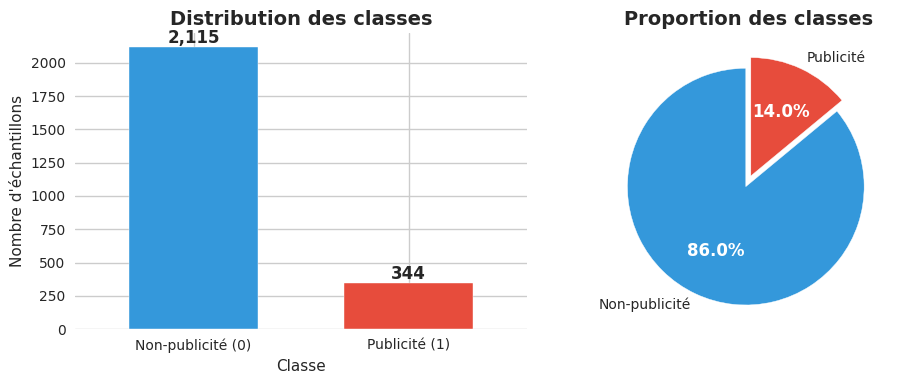


💾 Graphique sauvegardé : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/target_distribution.png

💡 RECOMMANDATIONS POUR LA MODÉLISATION
📊 Niveau de déséquilibre : 🟠 Sévère (6.1:1)

🎯 Stratégies recommandées :
  ✅ Stratify=True pour train/validation split
  ✅ Optimiser pour F1-score
  ✅ Validation croisée stratifiée
  🔄 SMOTE ou class_weight='balanced'
  📊 Métriques robustes (Precision-Recall AUC)
  🎛️ Ajustement du seuil de classification
  🏗️ Modèles robustes (XGBoost, Random Forest)
  🎭 Techniques d'ensemble

📈 Seuils de performance :
  • F1-score baseline      : 0.245
  • F1-score cible minimum : 0.345
  • F1-score excellent     : 0.700+

💾 Mise à jour de la configuration...
✅ Configuration mise à jour : PROJECT_CONFIG.CLASS_DISTRIBUTION = {0: np.int64(2115), 1: np.int64(344)}
✅ Configuration mise à jour : PROJECT_CONFIG.IMBALANCE_RATIO_CALCULATED = 6.148255813953488
✅ Configuration mise à jour : PROJECT_CONFIG.BASELINE_F1_SCORE = 0.24545130217623973
✅ Configuration mise 

In [40]:
## 3.3 Distribution de la variable cible <a id="distribution-variable-cible"></a>

# ============================================================================
# ANALYSE AUTOMATISÉE DE LA VARIABLE CIBLE VIA MODULE
# ============================================================================

print("🎯 Analyse automatisée de la variable cible")
print("=" * 50)

# Import du module d'analyse cible
try:
    from exploration.target_analyzer import (
        analyze_target_complete,
        update_config_with_target_stats
    )
    print("✅ Module target_analyzer importé")
except ImportError as e:
    print(f"❌ Erreur import : {e}")
    raise

# Validation de la variable cible
if 'y' not in df_study.columns:
    raise ValueError("❌ Colonne cible 'y' introuvable dans df_study")

# ============================================================================
# ANALYSE COMPLÈTE AUTOMATISÉE
# ============================================================================

# Analyse complète avec visualisations et recommandations
target_stats = analyze_target_complete(
    df=df_study,
    target_col='y',
    figures_dir=FIGURES_DIR,
    verbose=True
)

# ============================================================================
# MISE À JOUR DE LA CONFIGURATION
# ============================================================================

print(f"\n💾 Mise à jour de la configuration...")

config_updated = update_config_with_target_stats(config, target_stats)

if config_updated:
    print("✅ Configuration mise à jour avec les statistiques cible")
else:
    print("⚠️ Problème lors de la mise à jour de la configuration")

# ============================================================================
# EXPORT DES VARIABLES POUR LA SUITE
# ============================================================================

# Variables importantes pour les sections suivantes
imbalance_ratio = target_stats['imbalance_ratio']
baseline_f1 = target_stats['baseline_f1']
target_distribution = target_stats['counts']
minority_proportion = target_stats['minority_proportion']

print(f"\n🌍 Variables exportées pour la suite :")
print(f"  ✅ imbalance_ratio      : {imbalance_ratio:.2f}")
print(f"  ✅ baseline_f1          : {baseline_f1:.3f}")
print(f"  ✅ target_distribution  : {target_distribution}")
print(f"  ✅ minority_proportion  : {minority_proportion:.3f}")

# Validation pour la suite
if imbalance_ratio > 3:
    print(f"\n⚠️ Dataset fortement déséquilibré - Stratégies spéciales requises")
    print(f"💡 Utilisez class_weight='balanced' et optimisez pour F1-score")

print(f"\n✅ Analyse de la variable cible terminée")
print(f"🚀 Prêt pour l'analyse exploratoire approfondie (section 4)")

# 4. Analyse exploratoire <a id="analyse-exploratoire"></a>

## 4.1 Analyse des valeurs manquantes <a id="analyse-des-valeurs-manquantes"></a>

**Objectif** : Identifier les valeurs manquantes dans le dataset d’entraînement et d’évaluation, analyser leur pattern (MCAR, MAR, MNAR), et proposer une stratégie d’imputation adaptée.

**Théorie** : Les valeurs manquantes peuvent être MCAR (aléatoires), MAR (liées à d’autres variables observées), ou MNAR (liées à la variable elle-même). Une corrélation significative entre l’indicateur de valeurs manquantes et la variable cible suggère un pattern MAR, nécessitant une imputation sophistiquée (k-NN, MICE).

**Méthodologie** : Nous calculons le pourcentage de valeurs manquantes par colonne, visualisons leur pattern via une heatmap, et analysons la corrélation entre les indicateurs de valeurs manquantes et la variable cible encodée. Une stratégie d’imputation est proposée en fonction des résultats.

**Prochaines étapes** : Si un pattern MAR est confirmé, préparer une imputation multivariée (section 5.3). Vérifier l’impact des imputations sur les performances des modèles.

🔍 Analyse des valeurs manquantes

📊 Analyse globale des valeurs manquantes :
Total missing       : 2037 (0.05%)
Colonnes affectées  : 4
  • Critique (>50%)  : 0
  • Élevé (30-50%)   : 0
  • Moyen (10-30%)   : 3
  • Faible (<10%)    : 1

💡 Recommandations:
   ✅ Imputation standard possible pour: ['X1', 'X2', 'X3', 'X4']

Top 5 colonnes manquantes :
X3   27.6129
X1   27.4095
X2   27.3688
X4    0.4473
dtype: float64

📈 Détail des valeurs manquantes pour les variables continues :
  - X1: 674 (27.41%)
  - X2: 673 (27.37%)
  - X3: 679 (27.61%)
  - X4: 11 (0.45%)


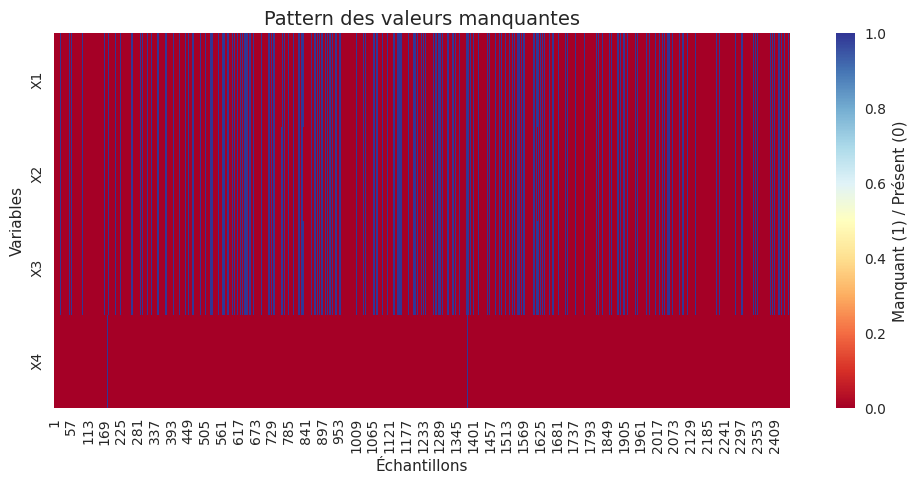


🔍 Analyse du type de valeurs manquantes (MAR vs MCAR) :
  - X1: corrélation avec y = -0.101
    → Potentiellement MAR (Missing At Random)
  - X2: corrélation avec y = -0.100
    → Potentiellement MAR (Missing At Random)
  - X3: corrélation avec y = -0.102
    → Potentiellement MAR (Missing At Random)
  - X4: corrélation avec y = 0.061
    → Potentiellement MCAR (Missing Completely At Random)

📊 Analyse des valeurs manquantes dans le fichier d'évaluation :
Total missing       : 692 (0.05%)
Colonnes affectées  : 4
  • Critique (>50%)  : 0
  • Élevé (30-50%)   : 0
  • Moyen (10-30%)   : 3
  • Faible (<10%)    : 1

💡 Recommandations:
   ✅ Imputation standard possible pour: ['X1', 'X2', 'X3', 'X4']

Top 5 colonnes manquantes :
X3   28.1707
X1   27.9268
X2   27.8049
X4    0.4878
dtype: float64

🔄 Comparaison des patterns de valeurs manquantes :
  - Fichier d'étude : 0.05% manquant
  - Fichier d'évaluation : 0.05% manquant

💡 Stratégie d'imputation recommandée :
  - X4 (0.4% manquant) : Impu

In [41]:
# 4. Analyse exploratoire <a id="analyse-exploratoire"></a>
## 4.1 Analyse des valeurs manquantes <a id="analyse-des-valeurs-manquantes"></a>

print("🔍 Analyse des valeurs manquantes")
print("="*60)

# Utilisation de la fonction du module
from preprocessing.missing_values import (
    analyze_missing_values,
    handle_missing_values,
    find_optimal_k
)



print("\n📊 Analyse globale des valeurs manquantes :")
missing_stats = analyze_missing_values(df_study)

# Analyse détaillée pour les colonnes continues
print("\n📈 Détail des valeurs manquantes pour les variables continues :")
for col in continuous_cols:
    missing_count = df_study[col].isnull().sum()
    missing_pct = (missing_count / len(df_study)) * 100
    print(f"  - {col}: {missing_count} ({missing_pct:.2f}%)")

# Visualisation des patterns de valeurs manquantes
if missing_stats['total_missing'] > 0:
    # Heatmap des valeurs manquantes pour les colonnes avec des NaN
    cols_with_missing = [col for col in df_study.columns if df_study[col].isnull().sum() > 0]

    if len(cols_with_missing) > 0:
        plt.figure(figsize=(10, 5))

        # Créer une matrice binaire des valeurs manquantes
        missing_matrix = df_study[cols_with_missing].isnull().astype(int)

        # Heatmap
        sns.heatmap(missing_matrix.T, cmap='RdYlBu', cbar_kws={'label': 'Manquant (1) / Présent (0)'})
        plt.title('Pattern des valeurs manquantes', fontsize=14)
        plt.xlabel('Échantillons')
        plt.ylabel('Variables')
        plt.tight_layout()
        plt.savefig(FIGURES_DIR / 'eda' / 'missing_values_pattern.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Analyse du pattern MAR vs MCAR
        print("\n🔍 Analyse du type de valeurs manquantes (MAR vs MCAR) :")

        # Corrélation entre les valeurs manquantes et la cible
        for col in cols_with_missing:
            missing_indicator = df_study[col].isnull().astype(int)
            correlation_with_target = missing_indicator.corr(df_study['y'])
            print(f"  - {col}: corrélation avec y = {correlation_with_target:.3f}")

            if abs(correlation_with_target) > 0.1:
                print(f"    → Potentiellement MAR (Missing At Random)")
            else:
                print(f"    → Potentiellement MCAR (Missing Completely At Random)")
else:
    print("\n✅ Aucune valeur manquante détectée dans le dataset !")

# Analyse pour le fichier d'évaluation aussi
print("\n📊 Analyse des valeurs manquantes dans le fichier d'évaluation :")
missing_stats_eval = analyze_missing_values(df_eval)

# Comparaison des patterns
if missing_stats['total_missing'] > 0 or missing_stats_eval['total_missing'] > 0:
    print("\n🔄 Comparaison des patterns de valeurs manquantes :")
    print(f"  - Fichier d'étude : {missing_stats['percent_missing']:.2f}% manquant")
    print(f"  - Fichier d'évaluation : {missing_stats_eval['percent_missing']:.2f}% manquant")

    # Stratégie d'imputation recommandée
    print("\n💡 Stratégie d'imputation recommandée :")
    if 'X4' in missing_stats['cols_missing']:
        x4_missing_pct = missing_stats['percent_per_col'].get('X4', 0)
        if x4_missing_pct < 5:
            print(f"  - X4 ({x4_missing_pct:.1f}% manquant) : Imputation par la médiane")

    mar_cols = ['X1', 'X2', 'X3']
    mar_missing = any(col in missing_stats['cols_missing'] for col in mar_cols)
    if mar_missing:
        print(f"  - X1, X2, X3 (variables continues) : KNN ou MICE (imputation multivariée)")

In [42]:
# Correction du type et imputation de X4
print("\n🔧 Correction du type de X4...")
print(f"Valeurs uniques de X4 (avant correction) : {sorted(df_study['X4'].dropna().unique())}")
print(f"Type actuel : {df_study['X4'].dtype}")

# Vérifier que X4 ne contient que 0 et 1
unique_values = df_study['X4'].dropna().unique()
if set(unique_values).issubset({0.0, 1.0}):
    # Imputer d'abord les valeurs manquantes par la médiane
    X4_median = df_study['X4'].median()
    df_study['X4'] = df_study['X4'].fillna(X4_median)
    df_eval['X4'] = df_eval['X4'].fillna(X4_median)

    # Convertir en int
    df_study['X4'] = df_study['X4'].astype(int)
    df_eval['X4'] = df_eval['X4'].astype(int)

    print(f"✅ X4 converti en int64 après imputation par la médiane ({X4_median})")
    print(f"Nouveau type : {df_study['X4'].dtype}")

    # Mettre à jour la configuration
    config.update("COLUMN_CONFIG.CONTINUOUS_COLS", ['X1', 'X2', 'X3'])
    config.update("COLUMN_CONFIG.BINARY_COLS", ['X4'] + binary_cols)
    continuous_cols = ['X1', 'X2', 'X3']  # Mise à jour locale
else:
    print("⚠️ X4 contient des valeurs autres que 0 et 1, conservation en float64")

# Résumé final
print("\n📊 Résumé des valeurs manquantes après traitement de X4 :")
print(f"  - X1, X2, X3 : ~27% manquant → À traiter avec KNN/MICE")
print(f"  - X4 : Imputé et converti en binaire")
print(f"  - Pattern MAR détecté pour X1, X2, X3 (corrélation avec y ≈ -0.10)")
print(f"  - Les patterns sont cohérents entre fichiers d'étude et d'évaluation")


🔧 Correction du type de X4...
Valeurs uniques de X4 (avant correction) : [np.float64(0.0), np.float64(1.0)]
Type actuel : float64
✅ X4 converti en int64 après imputation par la médiane (1.0)
Nouveau type : int64
✅ Configuration mise à jour : COLUMN_CONFIG.CONTINUOUS_COLS = ['X1', 'X2', 'X3']
✅ Configuration mise à jour : COLUMN_CONFIG.BINARY_COLS = ['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X


## 4.2 Analyse statistique des variables quantitatives


📊 Analyse statistique des variables quantitatives
📊 Statistiques descriptives :
             X1        X2        X3
count 1785.0000 1786.0000 1780.0000
mean    63.7787  155.1282    3.8862
std     54.6496  129.3308    5.7882
min      1.0000    1.0000    0.0015
25%     25.0000   80.0000    1.0416
50%     51.0000  110.0000    2.1428
75%     85.0000  184.7500    5.3333
max    640.0000  640.0000   60.0000

📊 Analyse de la distribution :

X1:
  - Skewness (asymétrie) : 2.527
  - Kurtosis (aplatissement) : 13.170
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Distribution non normale (nécessite transformation)

X2:
  - Skewness (asymétrie) : 1.633
  - Kurtosis (aplatissement) : 1.953
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Distribution non normale (nécessite transformation)

X3:
  - Skewness (asymétrie) : 7.057
  - Kurtosis (aplatissement) : 63.405
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Distribution non normale (nécessite transformation)

🔍 Détection des outliers (méth

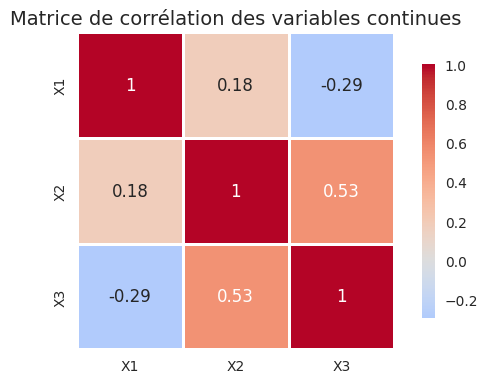


💡 Résumé et recommandations :
  - Les trois variables continues montrent des distributions fortement asymétriques
  - Transformation Yeo-Johnson recommandée pour normaliser les distributions
  - Outliers détectés : 293 au total
  - Corrélations faibles avec la cible, mais potentiellement utiles après transformation


In [43]:

## 4.2 Analyse statistique des variables quantitatives <a id="analyse-statistique-des-variables-quantitatives"></a>

print("📊 Analyse statistique des variables quantitatives")
print("="*60)

from exploration.statistics import analyze_continuous_variables
#from modules.exploration.statistics import analyze_continuous_variables


# Lancement de l’analyse complète
results_stats = analyze_continuous_variables(
    df=df_study,
    continuous_cols=continuous_cols,
    target_col='y',
    save_figures_path=str(FIGURES_DIR / "eda")  # Assure-toi que ce dossier existe
)



## 4.3 Visualisation des distributions et des boxplots <a id="distributions-et-boxplots"></a>

📊 Visualisation des distributions et des boxplots


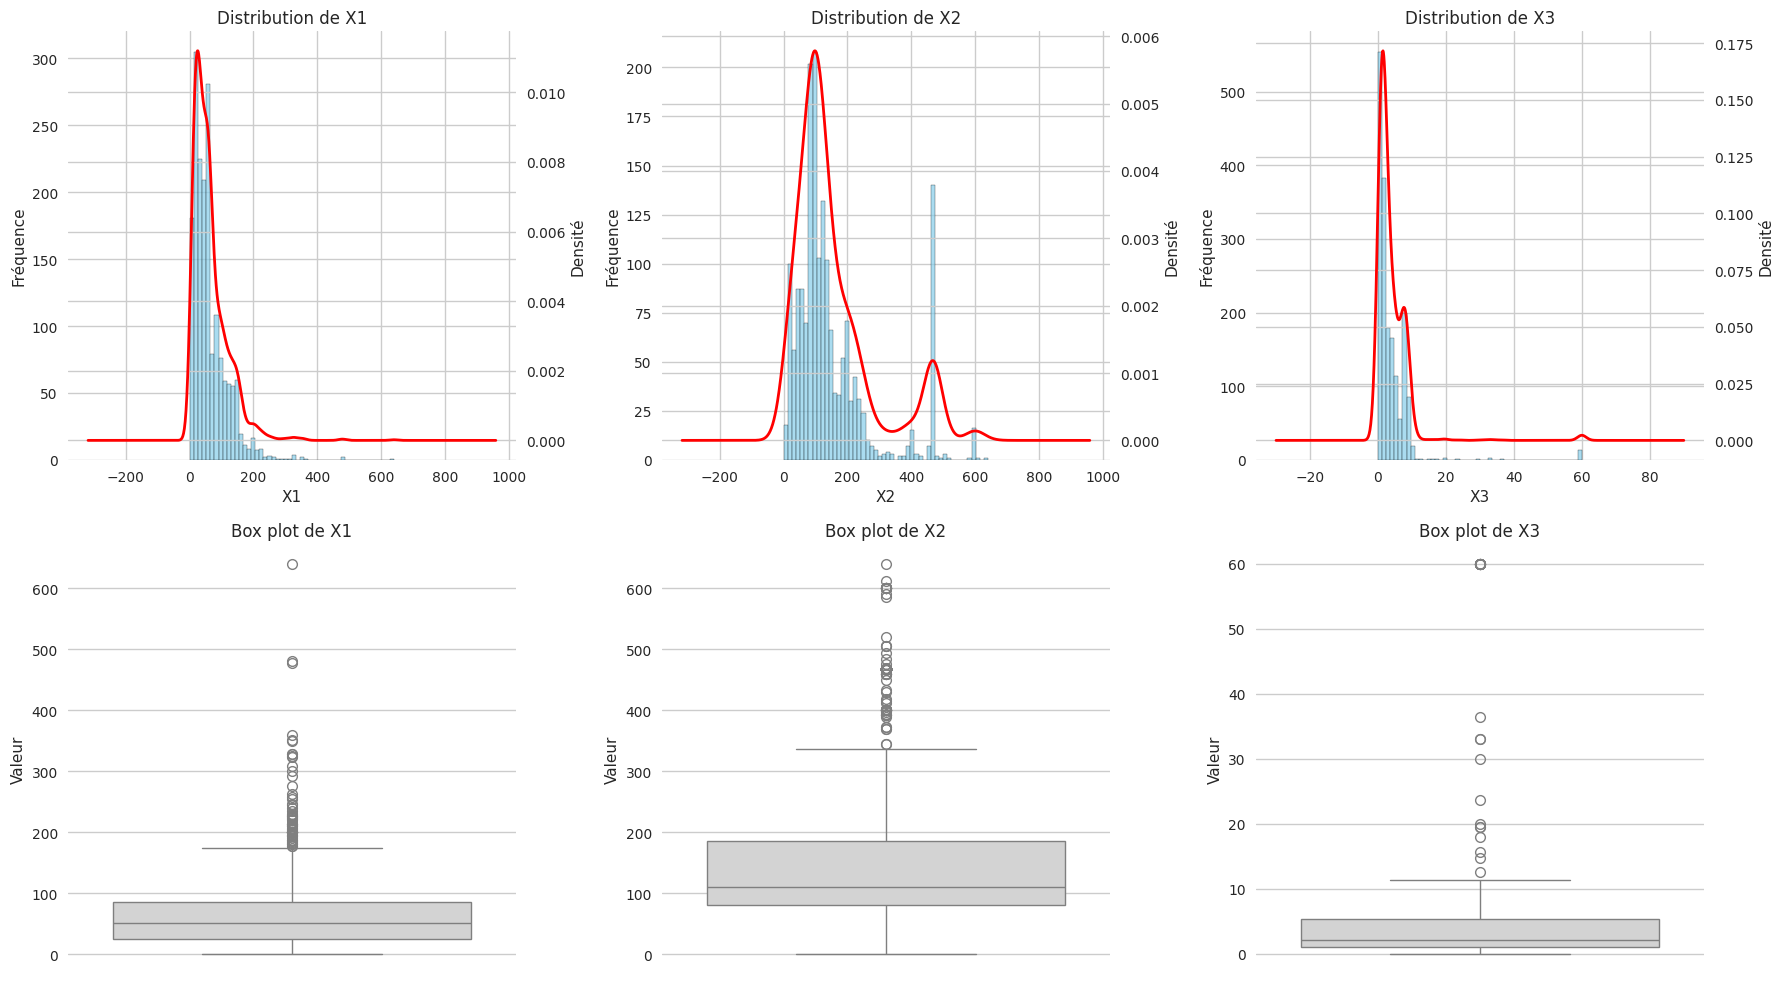

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/continuous_distributions_boxplots.png
✅ Visualisations sauvegardées dans : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/continuous_distributions_boxplots.png


In [44]:
## 4.3 Visualisation des distributions et des boxplots <a id="distributions-et-boxplots"></a>

print("📊 Visualisation des distributions et des boxplots")
print("="*60)

from exploration.visualization import visualize_distributions_and_boxplots
# Appel de la fonction
visualize_distributions_and_boxplots(
    df=df_study,
    continuous_cols=continuous_cols,
    output_dir=FIGURES_DIR / "eda"
)

## 📊 Synthèse de l'analyse statistique

### Variables analysées : X1, X2, X3 (~1780 observations chacune)

**🔍 Principales observations :**
- **Distributions non-normales** : Toutes variables fortement asymétriques (skewness : 1.6 à 7.1)
- **293 outliers** détectés (~16% des données)
- **Corrélations notables** : X2-X3 (r=0.53), X1-X3 (r=-0.29)

**⚠️ Points d'attention :**
- Écart important moyenne/médiane pour toutes variables
- X3 particulièrement problématique (skewness=7.06, kurtosis=63.4)
- Tests de Shapiro-Wilk : p<0.001 (rejet normalité)

**🔄 Actions requises :**
- **Transformation Yeo-Johnson** recommandée avant analyse paramétrique
- Considérer méthodes robustes/non-paramétriques
- Investigation des valeurs aberrantes


## 4.4 Distribution des variables binaires <a id="distribution-des-variables-binaires"></a>


🔢 Analyse de la distribution des variables binaires

📊 Nombre total de variables binaires : 1555

📊 Statistiques des taux de présence :
  - Moyenne : 0.81%
  - Médiane : 0.49%
  - Min : 0.08%
  - Max : 76.98%

📊 Sparsité globale : 99.19% de zéros


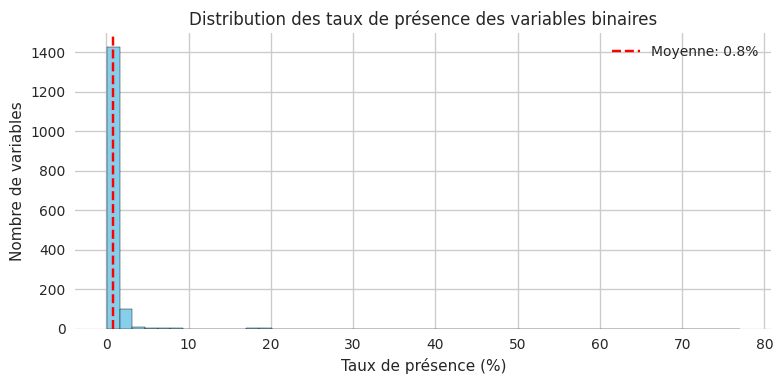

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/binary_presence_distribution.png

✅ Analyse des variables binaires terminée
   → Dataset très sparse, adapté pour des méthodes de sélection de features


In [45]:
## 4.4 Distribution des variables binaires <a id="distribution-des-variables-binaires"></a>

print("🔢 Analyse de la distribution des variables binaires")
print("="*60)

from exploration.visualization import save_fig

# Variables binaires (exclut les variables continues)
binary_cols = [col for col in df_study.columns if col.startswith('X') and col not in continuous_cols]
print(f"\n📊 Nombre total de variables binaires : {len(binary_cols)}")

# Taux de présence (valeurs à 1)
presence_rates = {
    col: (df_study[col] == 1).sum() / len(df_study) * 100 for col in binary_cols
}
presence_series = pd.Series(presence_rates)

# Statistiques globales
print(f"\n📊 Statistiques des taux de présence :")
print(f"  - Moyenne : {presence_series.mean():.2f}%")
print(f"  - Médiane : {presence_series.median():.2f}%")
print(f"  - Min : {presence_series.min():.2f}%")
print(f"  - Max : {presence_series.max():.2f}%")

# Sparsité globale
total_values = len(df_study) * len(binary_cols)
total_ones = df_study[binary_cols].sum().sum()
sparsity = (1 - total_ones / total_values) * 100
print(f"\n📊 Sparsité globale : {sparsity:.2f}% de zéros")

# Visualisation
plt.figure(figsize=(8, 4))
presence_series.hist(bins=50, color='skyblue', edgecolor='black')
plt.axvline(presence_series.mean(), color='red', linestyle='--', label=f'Moyenne: {presence_series.mean():.1f}%')
plt.xlabel('Taux de présence (%)')
plt.ylabel('Nombre de variables')
plt.title('Distribution des taux de présence des variables binaires')
plt.legend()
plt.tight_layout()

save_fig("binary_presence_distribution.png", directory=FIGURES_DIR / "eda", dpi=300, show=True)

print("\n✅ Analyse des variables binaires terminée")
print("   → Dataset très sparse, adapté pour des méthodes de sélection de features")


## 4.5 Analyse des corrélations combinées <a id="analyse-correlations-combinees"></a>



🔗 Lancement de l'analyse combinée des corrélations (features ↔ cible, features ↔ features)...
## Analyse des corrélations <a id='analyse-des-correlations'></a>

🔗 Analyse des corrélations

📊 Sélection des variables pour l’analyse des corrélations...
  - Variables sélectionnées : 43 (3 continues + 40 binaires)

📊 Calcul de la matrice de corrélation...

🎯 Top 10 corrélations avec la cible (y) :
  - X2: 0.5732
  - X1424: 0.2709
  - X168: 0.2245
  - X1294: 0.2069
  - X664: 0.1736
  - X1009: 0.1662
  - X27: 0.1503
  - X483: 0.1417
  - X1438: 0.1311
  - X3: 0.1301

🎯 Bottom 10 corrélations avec la cible (y) :
  - X363: -0.0305
  - X590: -0.0305
  - X809: -0.0316
  - X69: -0.0326
  - X852: -0.0336
  - X324: -0.0346
  - X1039: -0.0409
  - X1314: -0.0557
  - X265: -0.0575
  - X549: -0.1289


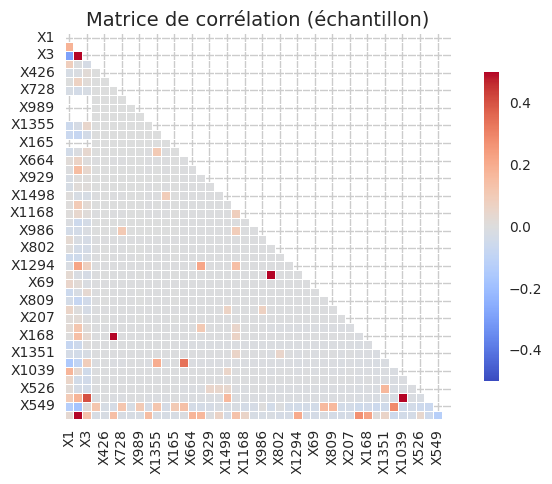

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/correlation_matrix_sample.png

🔍 Analyse des corrélations entre features :
⚠️ Paires de variables très corrélées : 1
  - X909 vs X363: 0.935

## 4.5 Analyse approfondie des corrélations <a id='analyse-approfondie-correlations'></a>

🔗 Analyse approfondie des corrélations entre variables...

=== Analyse Bivariée ===

🔝 Top 20 variables les plus corrélées à la cible :
  feature  correlation
1      X2       0.5732
2      X3       0.1301
0      X1       0.0342

🔢 Variables binaires très corrélées (|r| > 0.95):
  - Nombre total : 3506
  - Moyenne : 0.993
  - Max : 1.000

  Exemples :
    1. X6 ↔ X245: r = 1.000
    2. X6 ↔ X487: r = 1.000
    3. X6 ↔ X596: r = 1.000
    4. X7 ↔ X332: r = 1.000
    5. X7 ↔ X619: r = 1.000


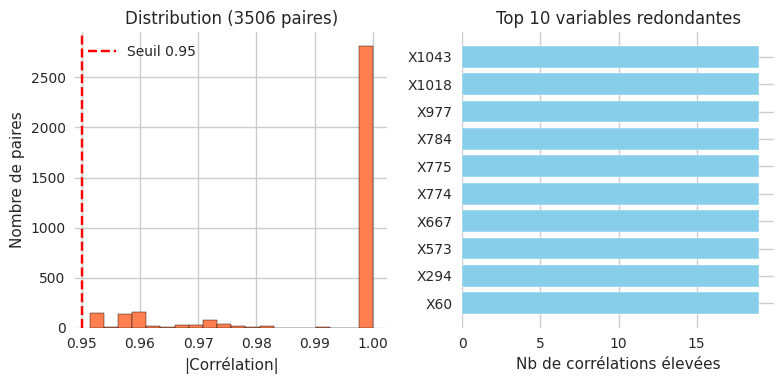

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/binary_correlations_analysis.png

💡 Résumé :
  - Corrélation max avec y : 0.573
  - Dataset sparse avec peu de multicolinéarité
  - Réduction de dimension recommandée (sélection ou PCA)

✅ Résultats sauvegardés dans : /content/drive/MyDrive/projet_sta211/results/bivariate_analysis_results.json


In [46]:
## 4.5 Analyse des corrélations combinées <a id="analyse-correlations-combinees"></a>

print("🔗 Lancement de l'analyse combinée des corrélations (features ↔ cible, features ↔ features)...")
print("=" * 80)

from exploration.eda_analysis import full_correlation_analysis

# Appel avec paramètres personnalisés
full_correlation_analysis(
    df_study=df_study,
    continuous_cols=continuous_cols,
    presence_rates=presence_rates,
    FIGURES_DIR=FIGURES_DIR,
    ROOT_DIR=ROOT_DIR,
    figsize_corr_matrix=(7, 5),
    figsize_binary=(8, 4)
)

## 📌 Synthèse de l'analyse des corrélations <a id="synthese-correlations"></a>

### 🔍 Corrélations avec la variable cible (`y`)

- ✅ **Meilleure variable prédictive continue** : `X2` avec une corrélation de **0.573**
- 📉 Les autres variables (continues ou binaires) ont une corrélation **faible à modérée** avec `y` (souvent < 0.2)
- ℹ️ Cela suggère que la **modélisation devra combiner plusieurs variables** pour être efficace

---

### 🔗 Corrélations entre variables

- ⚠️ **1 paire** de variables (binaires ou continues) présente une **corrélation > 0.8**
- ✅ **Multicolinéarité faible** → pas de besoin urgent de supprimer des variables continues

---

### Redondance dans les variables binaires

- 📊 **3 506 paires** de variables binaires présentent une corrélation **> 0.95**
- 🔁 Ces paires impliquent **de nombreuses variables dupliquées** ou très similaires
- 🧠 Certaines variables sont impliquées dans **15+ paires corrélées**, suggérant des motifs de duplication

---

### 🧭 Recommandations

- 🧹 Appliquer une **réduction de dimension** avant la modélisation :
  - Suppression de variables binaires fortement redondantes
  - Utilisation de **PCA**, **autoencoders** ou sélection par importance (e.g. **Random Forest**)
- 🎯 Se concentrer sur `X2` et les variables binaires les plus corrélées à `y` comme features de base

---

## 4.6 Visualisations globales de l'EDA <a id="visualisation-globale"></a>


📊 Visualisations exploratoires

📈 Distribution des variables continues par classe...


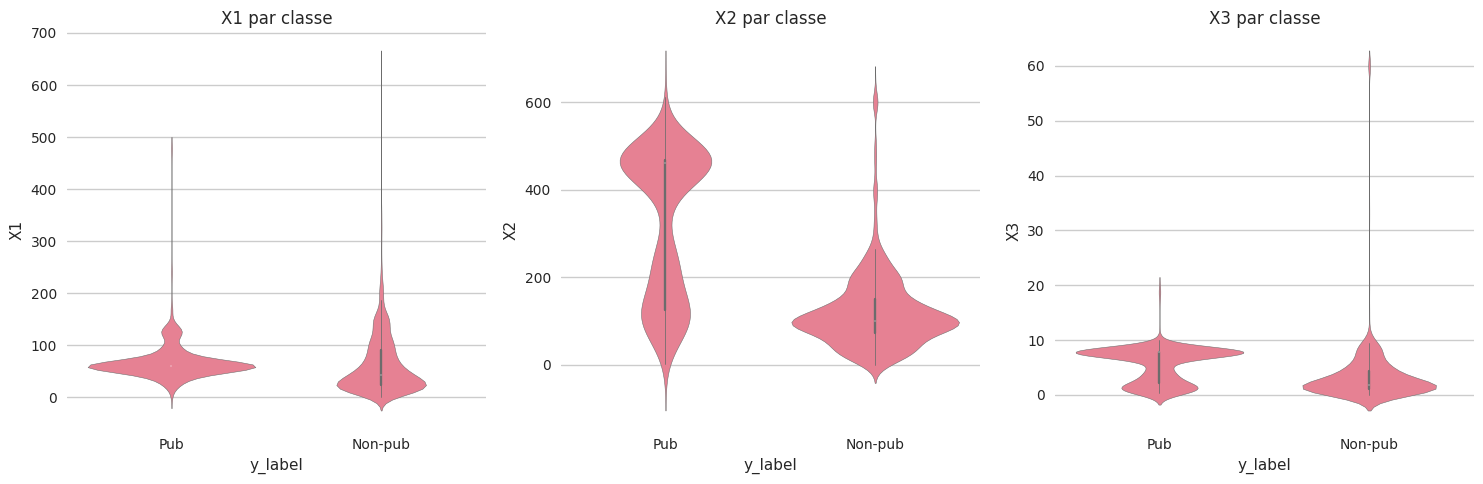

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/continuous_by_class.png

📉 Visualisation de la sparsité des données binaires...


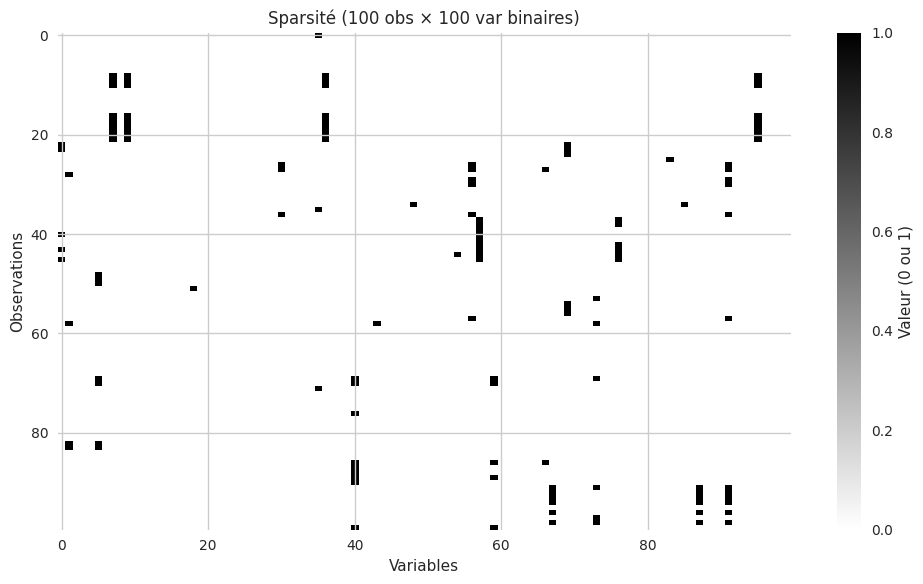

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/sparsity_visualization.png


In [47]:
## 4.6 Visualisations globales de l'EDA <a id="visualisation-globale"></a>

print("📊 Visualisations exploratoires")
print("=" * 60)

# Imports des fonctions refactorisées
from exploration.visualization import (
    compare_visualization_methods,
    plot_continuous_by_class,
    plot_binary_sparsity,
    plot_continuous_target_corr,
    plot_eda_summary,
    save_fig
)
from exploration.statistics import optimized_feature_importance

# 1. Distribution des variables continues par classe
print("\n📈 Distribution des variables continues par classe...")
plot_continuous_by_class(
    df=df_study,
    continuous_cols=continuous_cols,
    output_dir=FIGURES_DIR / 'eda'
)

# 2. Visualisation de la sparsité
print("\n📉 Visualisation de la sparsité des données binaires...")
plot_binary_sparsity(
    df=df_study,
    binary_cols=binary_cols,
    output_dir=FIGURES_DIR / 'eda'
)


### 📊 Interprétation des visualisations exploratoires

#### 1. Distribution des variables continues par classe

Les violons illustrent clairement des différences significatives entre les distributions des variables `X1`, `X2` et `X3` selon la classe cible :

- **X1** : bien que les deux classes présentent une forte asymétrie à droite, les observations `Pub` tendent à être plus concentrées autour de valeurs moyennes élevées (~80), tandis que les `Non-pub` sont réparties plus bas avec une plus grande variance.
- **X2** : c’est la variable la plus discriminante visuellement. Les valeurs des `Pub` sont majoritairement regroupées autour de 400–500, tandis que celles des `Non-pub` sont concentrées plus bas (~100).
- **X3** : également discriminante, avec les `Pub` généralement autour de 8 et les `Non-pub` proches de 2. Cela suggère une séparation nette entre les classes.

Ces tendances suggèrent que ces trois variables continues auront un fort pouvoir prédictif dans les modèles supervisés.

#### 2. Visualisation de la sparsité des variables binaires

La matrice de sparsité révèle :

- Un fort taux de zéros (valeurs absentes), ce qui est typique de jeux de données contenant des variables binaires indicatrices ou issues de codage one-hot.
- Certaines colonnes semblent plus denses que d'autres, indiquant des variables peut-être redondantes ou peu informatives.
- La parcimonie globale pourrait justifier une sélection de variables ou l’usage de méthodes adaptées comme la régularisation (L1) ou l’analyse de variance.

> 🧠 Ces visualisations permettent d’orienter les étapes suivantes de sélection de variables, réduction de dimension et construction de modèles.




🔗 Corrélations des variables continues avec la cible...


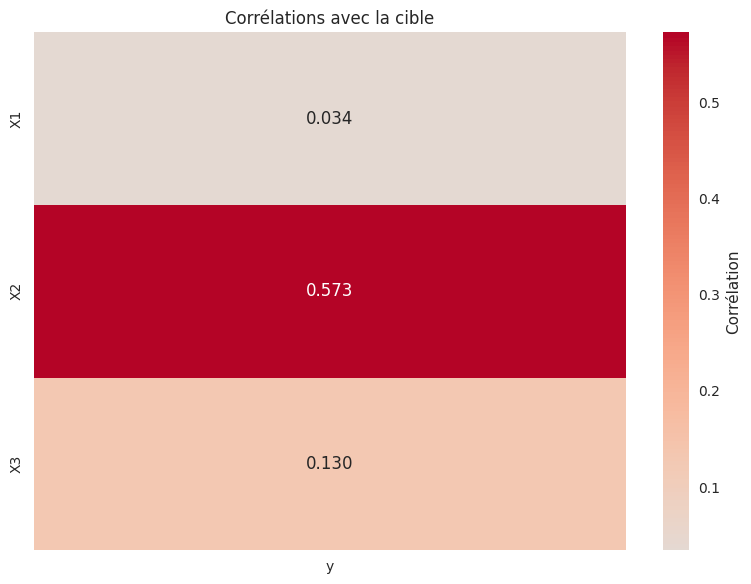

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/continuous_target_correlation.png

📊 Visualisation multidimensionnelle (PCA / t-SNE / UMAP)...


In [48]:

# 3. Corrélations des variables continues avec la cible
print("\n🔗 Corrélations des variables continues avec la cible...")
plot_continuous_target_corr(
    df=df_study,
    continuous_cols=continuous_cols,
    output_dir=FIGURES_DIR / 'eda'
)

# 4. Réduction de dimension avec UMAP / t-SNE / PCA
print("\n📊 Visualisation multidimensionnelle (PCA / t-SNE / UMAP)...")

df_study_viz = df_study.copy()
df_study_viz['outcome'] = df_study_viz['y'].map({0: 'noad.', 1: 'ad.'})  # ✅ temporaire

# 🔁 Recalcul des corrélations si besoin
target_corr = df_study[continuous_cols + ['y']].corr()['y'].drop('y')

important_features = continuous_cols + list(target_corr.abs().nlargest(30).index)
df_sample = df_study_viz[important_features + ['outcome']].dropna()



### 🔗 Interprétation des corrélations avec la cible

Le graphique présente les corrélations linéaires entre les variables continues (`X1`, `X2`, `X3`) et la variable cible `y`.

- **X2** présente une corrélation modérément forte avec la cible (`r = 0.573`), ce qui confirme son rôle discriminant déjà observé dans les violons plot. Elle est un excellent candidat pour la modélisation.
- **X3** affiche une corrélation plus faible (`r = 0.130`), mais conserve un potentiel informatif, surtout en combinaison avec d’autres variables.
- **X1** montre une corrélation quasi nulle (`r = 0.034`), ce qui suggère qu’elle est peu informative seule. Toutefois, elle pourrait avoir un effet utile dans des modèles non linéaires ou avec interactions.

> 🧠 Ces résultats orientent la sélection de variables pour les projections multivariées (UMAP, t-SNE, PCA) et la modélisation supervisée. Il est pertinent de privilégier `X2` et `X3`, tout en testant l’impact de `X1` selon les méthodes utilisées.



🌲 Analyse de l’importance des features...
⚠️ Erreur : The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

📊 Création du résumé visuel de l’EDA...


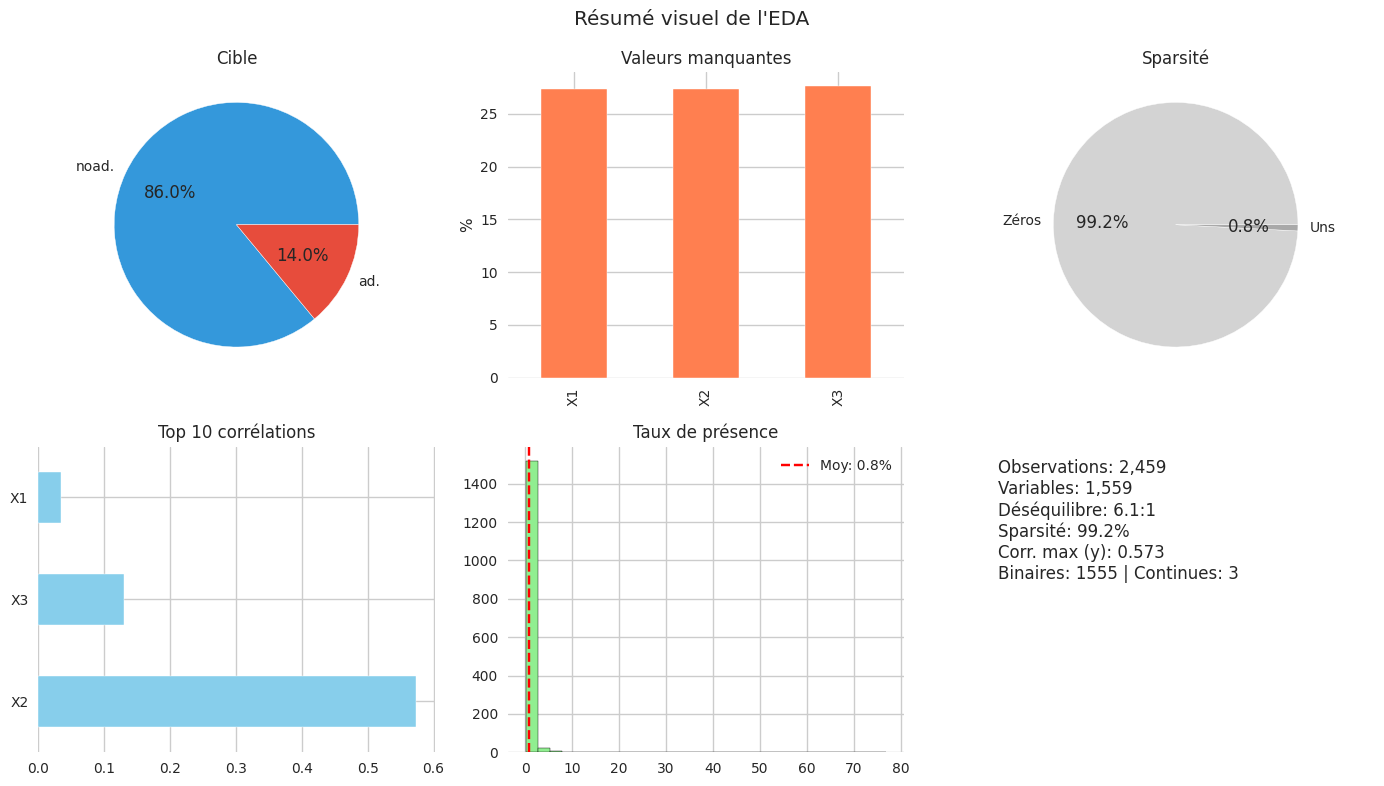

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/eda_summary.png

✅ Visualisations exploratoires terminées avec succès !


In [49]:

# 5. Importance des variables
print("\n🌲 Analyse de l’importance des features...")
try:
    df_importance = df_sample.copy()  # contient outcome déjà transformée
    importance_results = optimized_feature_importance(
        df=df_importance,
        target_col='outcome',
        method='all',
        top_n=10,
        figsize=(8, 4),
        save_path=FIGURES_DIR / 'eda' / 'feature_importance.png',
        show=True
    )
    if not importance_results.empty:
        print("\nTop 10 features les plus importantes :")
        print(importance_results[['feature', 'Combined_Score']].head(10))
except Exception as e:
    print(f"⚠️ Erreur lors de l’analyse d’importance des features : {e}")

# 6. Résumé visuel global
print("\n📊 Création du résumé visuel de l’EDA...")
plot_eda_summary(
    df=df_study,
    continuous_cols=continuous_cols,
    binary_cols=binary_cols,
    target_corr=target_corr,
    sparsity=sparsity,
    imbalance_ratio=imbalance_ratio,
    output_dir=FIGURES_DIR / 'eda',
    presence_series=presence_series
)

print("\n✅ Visualisations exploratoires terminées avec succès !")

## 🧭 Interprétations synthétiques des résultats de l'EDA <a id="interpretations-eda"></a>

### 🎯 1. Distribution des variables continues par classe
- **X1, X2, X3** présentent des distributions très différentes entre les deux classes (`ad.` vs `noad.`).
- **X2** se distingue particulièrement avec une séparation marquée entre les classes.
- Les distributions sont asymétriques, avec la présence d’**outliers** visibles dans chaque classe.

---

### 🧪 2. Corrélations avec la variable cible
- **X2** est la variable la plus corrélée avec la cible (`corr = 0.573`), ce qui en fait une **feature clé**.
- **X1** (`corr = 0.034`) et **X3** (`corr = 0.130`) ont des corrélations faibles mais non négligeables.
- Cela suggère l’utilité de **modèles non linéaires** ou **ensemble methods** (e.g. Random Forest, Gradient Boosting).

---

### 🧬 3. Visualisation de la sparsité des variables binaires
- Le dataset est **extrêmement sparse**, avec **99.2% de zéros** dans les variables binaires.
- Implications :
  - Risque de surapprentissage élevé si toutes les variables sont conservées.
  - Nécessité de sélection de variables ou de techniques de réduction (PCA, autoencoders).
  - Attention aux méthodes sensibles à la densité (ex : k-NN).

---

### 🗺️ 4. Résumé visuel global
- **Déséquilibre important** : 86% `noad.` vs 14% `ad.` → nécessite des stratégies adaptées :
  - Métriques robustes (F1-score, recall).
  - Rééchantillonnage ou `class_weight='balanced'`.
- **Valeurs manquantes** (~27%) dans X1, X2, X3 : à imputer avec méthode robuste (KNN, MICE).
- **Top corrélations** concentrées sur peu de variables → importance d’une **bonne sélection de features**.

---

### ✅ Recommandations clés
- **Prétraitement renforcé** :
  - Transformation des variables continues (Yeo-Johnson recommandée).
  - Suppression ou gestion des outliers extrêmes.
- **Réduction de dimension** :
  - Visualisation UMAP/t-SNE utile pour vérifier la structure.
  - Sélection de features importante avant modélisation (selon importance ou redondance).
- **Rééquilibrage des classes** indispensable pour éviter un biais fort du modèle vers la classe majoritaire.

---


# 5. Prétraitement avancé <a id="pretraitement-avance"></a>


### 5.1 Transformation Yeo-Johnson sur X1, X2, X3 <a id="transformation-yeo-johnson"></a>

#### 🔁 Transformation des variables continues

Les variables `X1`, `X2` et `X3` présentent une forte asymétrie positive ainsi que des valeurs extrêmes détectées via la règle de l’IQR.

#### 📌 Objectif :
- Stabiliser la variance
- Réduire l’impact des outliers
- Améliorer la distribution pour les modèles sensibles à la normalité (régression logistique, kNN…)

#### ⚙️ Méthode :
Nous utilisons la transformation **Yeo-Johnson** via `PowerTransformer`, qui accepte les valeurs nulles ou strictement positives.

> 🔧 Les colonnes transformées seront ajoutées en tant que `X1_trans`, `X2_trans` et `X3_trans`.

In [50]:
from preprocessing.final_preprocessing import apply_yeojohnson


# Appliquer Yeo-Johnson aux variables continues
df_study = apply_yeojohnson(df_study, columns=["X1", "X2", "X3"])

# Vérification visuelle rapide des variables transformées
df_study[["X1_trans", "X2_trans", "X3_trans"]].describe()



# # Utiliser ceci si on veut aussi le transformer tout en le sauvegardant
# # Appliquer Yeo-Johnson aux variables continues

# df_study, pt = apply_yeojohnson(
#     df=df_study,
#     columns=["X1", "X2", "X3"],
#     save_model=True,
#     model_path=MODELS_DIR / "yeojohnson_transformer.pkl",
#     return_transformer=True
# )




,X1_trans,X2_trans,X3_trans
count,1785.0000,1786.0000,1780.0000
mean,4.1962,7.0209,0.8632
std,0.9362,1.6675,0.2828
min,0.7029,0.7306,0.0015
25%,3.4817,6.2312,0.5833
50%,4.2833,6.8568,0.8343
75%,4.8793,7.9452,1.1282
max,7.3831,10.9369,1.5537


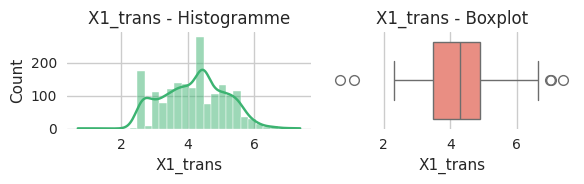

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/preprocessing/X1_trans_distribution_boxplot.png


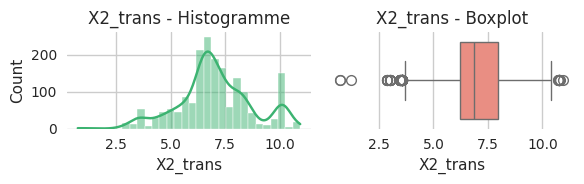

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/preprocessing/X2_trans_distribution_boxplot.png


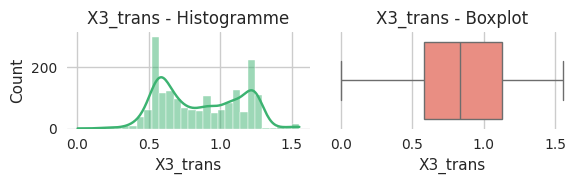

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/preprocessing/X3_trans_distribution_boxplot.png


In [51]:


# ✅ Liste des variables transformées
transformed_vars = ["X1_trans", "X2_trans", "X3_trans"]

# 📁 Dossier de sauvegarde
output_dir = FIGURES_DIR / 'preprocessing'
output_dir.mkdir(parents=True, exist_ok=True)

# 🔁 Génération et sauvegarde des figures
for col in transformed_vars:
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))

    # Histogramme + KDE
    sns.histplot(df_study[col], bins=30, kde=True, ax=ax[0], color="mediumseagreen")
    ax[0].set_title(f"{col} - Histogramme")
    ax[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df_study[col], ax=ax[1], color="salmon")
    ax[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()

    # 💾 Sauvegarde
    fig_path = output_dir / f"{col}_distribution_boxplot.png"
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✅ Figure sauvegardée : {fig_path}")


### 🔁 Transformation Yeo-Johnson des variables continues <a id="yeojohnson-interprétation"></a>

### Résultats visuels

Les histogrammes et boxplots suivants montrent l'effet de la transformation Yeo-Johnson sur les variables `X1`, `X2` et `X3` :

- ✅ **Meilleure symétrie** des distributions.
- ✅ **Réduction de l'effet des outliers** (même si certains persistent, notamment sur `X2`).
- ✅ **Concentration des valeurs** autour de la médiane, utile pour les modèles sensibles aux échelles et à la normalité.

---

### Interprétation

| Variable   | Résultat après transformation                             | Commentaire                                                                 |
|------------|------------------------------------------------------------|------------------------------------------------------------------------------|
| `X1_trans` | Distribution plus centrée et symétrique                   | Forte amélioration visuelle, outliers encore présents mais moins extrêmes   |
| `X2_trans` | Distribution toujours multimodale avec quelques extrêmes  | Transformation partiellement efficace – normalisation partielle             |
| `X3_trans` | Distribution globalement normalisée                       | Très bon résultat – faible asymétrie et étendue réduite                     |

---

### 📌 Conclusion

- La transformation **Yeo-Johnson** est efficace pour réduire l'asymétrie des variables `X1`, `X2` et `X3`.
- Elle **prépare les données à des modèles linéaires** ou sensibles aux distances (kNN, régression).
- Un **traitement complémentaire des outliers** peut être envisagé, surtout pour `X2`.


## 5.2 Détection et suppression des outliers <a id="detection-et-suppression-des-outliers"></a>

### 🎯 Objectifs :
- Identifier les observations extrêmes susceptibles de perturber la modélisation.
- Appliquer une stratégie de suppression uniquement sur les variables continues (`X1`, `X2`, `X3`), après transformation.

### 🛠️ Méthode :
- Utilisation de la règle de l’IQR (Interquartile Range).
- Application sur les colonnes transformées : `X1_trans`, `X2_trans`, `X3_trans`.
- Suppression des lignes contenant au moins un outlier dans ces colonnes.

### 📉 Impact attendu :
- Réduction de l’effet des valeurs extrêmes sur les modèles sensibles.
- Meilleure normalité après transformation.
- Perte contrôlée d’observations (généralement < 5%).

### ✅ Étapes suivantes :
1. Détection via IQR (Q1 - 1.5×IQR, Q3 + 1.5×IQR)
2. Comptage des lignes extrêmes par variable
3. Suppression des lignes avec outliers dans au moins une variable
4. Affichage du pourcentage de données supprimées

> 🔍 Cette étape ne sera appliquée que sur `df_study` (jeu d'entraînement).


In [52]:
## 5.2 Détection et suppression des outliers <a id="detection-et-suppression-des-outliers"></a>

print("🔍 Détection et suppression des outliers (méthode IQR)")
print("=" * 60)

from preprocessing.outliers import detect_and_remove_outliers

# ✅ Variables à traiter (transformées)
transformed_cols = ["X1_trans", "X2_trans", "X3_trans"]

# ✅ Sauvegarde de la version avant suppression
df_with_outliers = df_study.copy()

# ✅ Chemin de sauvegarde après nettoyage
output_path = OUTPUTS_DIR / "data" / "df_after_outliers.csv"

# ✅ Suppression des outliers avec export CSV
df_study = detect_and_remove_outliers(
    df=df_study,
    columns=transformed_cols,
    method='iqr',
    iqr_multiplier=1.5,
    verbose=True,
    save_path=output_path
)

# ✅ Aperçu statistique post-nettoyage
print("\n📊 Statistiques descriptives après suppression des outliers :")
display(df_study[transformed_cols].describe())





🔍 Détection et suppression des outliers (méthode IQR)
📉 X1_trans : 679 outliers détectés
📉 X2_trans : 768 outliers détectés
📉 X3_trans : 679 outliers détectés

✅ Total supprimé : 775 lignes
🔢 Dimensions finales : (1684, 1562)
💾 Données sauvegardées : /content/drive/MyDrive/projet_sta211/outputs/data/df_after_outliers.csv

📊 Statistiques descriptives après suppression des outliers :


,X1_trans,X2_trans,X3_trans
count,1684.0000,1684.0000,1684.0000
mean,4.2558,7.1481,0.8723
std,0.8980,1.4600,0.2722
min,2.2975,3.7058,0.2166
25%,3.6065,6.4151,0.6079
50%,4.3704,6.9289,0.8639
75%,4.9470,7.9891,1.1282
max,6.6431,10.3966,1.5026


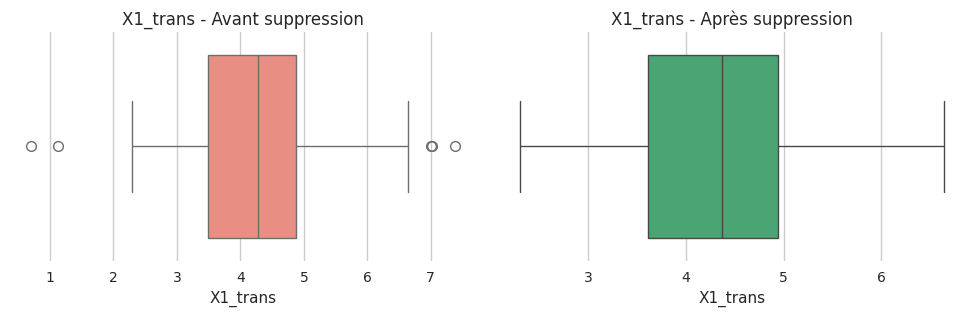

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/X1_trans_outliers_comparison.png


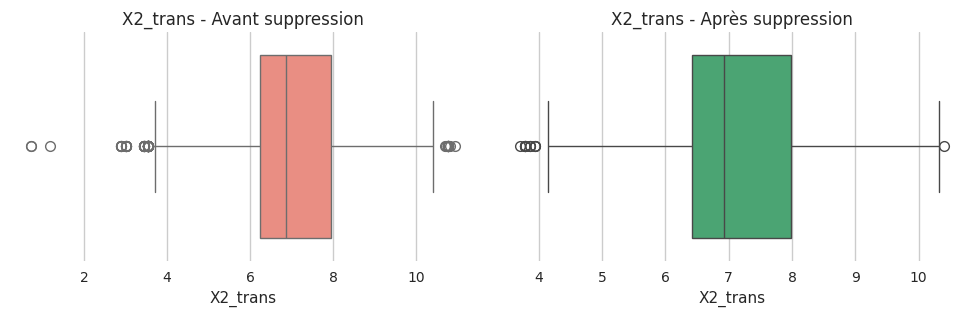

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/X2_trans_outliers_comparison.png


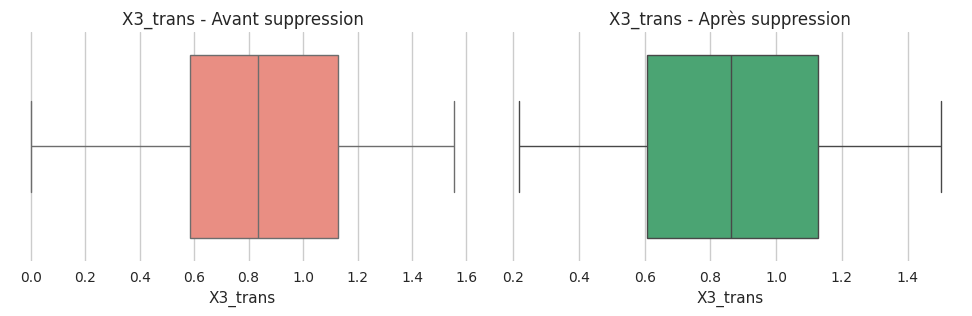

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/X3_trans_outliers_comparison.png


In [53]:

## 📊 Visualisation comparative avant/après suppression des outliers

from exploration.visualization import plot_outlier_comparison

# ✅ Comparaison visuelle avant / après (X1_trans, X2_trans, X3_trans)
plot_outlier_comparison(
    df_before=df_with_outliers,
    df_after=df_study,
    cols=transformed_cols,
    output_dir=FIGURES_DIR / "eda",
    show=True
)





## 📉 Analyse des effets de la suppression des outliers <a id="effet-suppression-outliers"></a>

### Objectif :
La détection des outliers est effectuée sur les variables transformées (`X1_trans`, `X2_trans`, `X3_trans`) via la méthode de l’IQR (Interquartile Range), afin de réduire l’influence des valeurs extrêmes sur les modèles.

---

### 🔍 Résultats :

#### ✅ **X1_trans**
- **Avant** : présence de plusieurs outliers extrêmes à gauche et à droite.
- **Après** : distribution recentrée, disparition des extrêmes anormaux.
- **Effet attendu** : meilleure stabilité pour les modèles linéaires sensibles à la variance.

#### ✅ **X2_trans**
- **Avant** : distribution asymétrique avec une concentration importante d’outliers à gauche (valeurs faibles).
- **Après** : distribution plus compacte, réduction de l’asymétrie, moins d’observations extrêmes.
- **Effet attendu** : amélioration de la normalité et du comportement statistique de la variable.

#### ✅ **X3_trans**
- **Avant** : très peu d’outliers détectés, distribution relativement homogène.
- **Après** : suppression minimale, confirmant que X3_trans était déjà bien normalisée.
- **Effet attendu** : impact marginal, mais bénéfique pour les modèles robustes.

---

### 🎯 Conclusion :
- La suppression des outliers permet d’obtenir des distributions plus resserrées et symétriques.
- Elle améliore la qualité des données, tout en préservant la majorité des observations informatives.
- Deux versions du dataset sont conservées :
  - **Avec outliers** : pour tester la robustesse des modèles.
  - **Sans outliers** : pour évaluer les gains en stabilité et performance.


## 5.3 Gestion des valeurs manquantes <a id="gestion-des-valeurs-manquantes"></a>

La gestion des valeurs manquantes est cruciale pour garantir la qualité des analyses et des modèles.

### 🔎 Objectifs :
- Imputer intelligemment les valeurs manquantes
- Préserver la structure statistique du dataset
- Minimiser la distorsion induite par les imputations

### ⚙️ Méthodologie adoptée :
- Analyse de la structure des valeurs manquantes (`MCAR`, `MAR`)
- Imputation simple (médiane) pour certaines variables
- Imputation multiple (MICE ou KNN) pour les autres
- Sauvegarde des jeux de données imputés pour modélisation


### ✅ 5.3.1 Imputation de X4 par la médiane <a id="imputation-x4-mediane"></a>

La variable `X4`, de type discrète (0/1), a été imputée **précocement par la médiane**, ce qui est adapté à une variable binaire avec peu de valeurs manquantes.  
→ Aucun traitement supplémentaire n’est nécessaire ici.

---

### 🚧 Prochaine étape : **imputation multiple** sur les variables continues `X1`, `X2`, `X3` via des méthodes plus robustes (KNN ou MICE).


### 5.3.2 Préparation pour l'imputation multivariée <a id="preparation-imputation-multivariee"></a>

🔧 Préparation à l'imputation multiple (KNN / MICE)

📊 Analyse (données avec outliers)
Total missing       : 2026 (27.46%)
Colonnes affectées  : 3
  • Critique (>50%)  : 0
  • Élevé (30-50%)   : 0
  • Moyen (10-30%)   : 3
  • Faible (<10%)    : 0

💡 Recommandations:
   ✅ Imputation standard possible pour: ['X1_trans', 'X2_trans', 'X3_trans']

Top 5 colonnes manquantes :
X3_trans   27.6129
X1_trans   27.4095
X2_trans   27.3688
dtype: float64


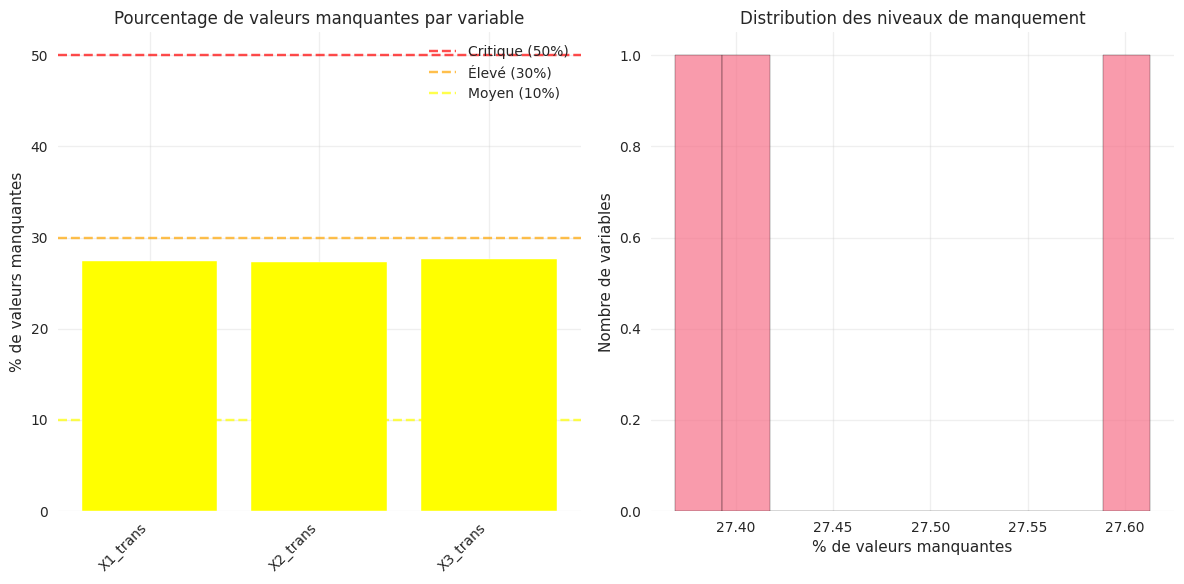


📌 Colonnes retenues (avec outliers) :
['X1_trans', 'X2_trans', 'X3_trans']

📊 Analyse (données sans outliers)
Total missing       : 0 (0.00%)
Colonnes affectées  : 0
  • Critique (>50%)  : 0
  • Élevé (30-50%)   : 0
  • Moyen (10-30%)   : 0
  • Faible (<10%)    : 0

Top 5 colonnes manquantes :
Series([], dtype: float64)

📌 Colonnes retenues (sans outliers) :
['X1_trans', 'X2_trans', 'X3_trans']


In [54]:
## 5.3.2 Préparation pour l'imputation multivariée <a id="preparation-imputation-multivariee"></a>

print("🔧 Préparation à l'imputation multiple (KNN / MICE)")
print("=" * 60)

from preprocessing.missing_values import analyze_missing_values

cols_to_check = ["X1_trans", "X2_trans", "X3_trans"]

# 📁 Analyse sur les données AVEC outliers
print("\n📊 Analyse (données avec outliers)")
analyze_missing_values(df=df_with_outliers, columns=cols_to_check, plot=True)

# ✅ Colonnes à imputer (si moins de 30 % de valeurs manquantes)
cols_impute_with_outliers = [col for col in cols_to_check
                             if df_with_outliers[col].isna().mean() < 0.30]

print("\n📌 Colonnes retenues (avec outliers) :")
print(cols_impute_with_outliers)


# 📁 Analyse sur les données SANS outliers
print("\n📊 Analyse (données sans outliers)")
analyze_missing_values(df=df_study, columns=cols_to_check, plot=True)

cols_impute_no_outliers = [col for col in cols_to_check
                           if df_study[col].isna().mean() < 0.30]

print("\n📌 Colonnes retenues (sans outliers) :")
print(cols_impute_no_outliers)



### 5.3.3 Imputation multivariée (MICE) <a id="imputation-multivariee-mice"></a>

#### Imputation MICE - données avec outliers

In [55]:
#### Imputation multivariée (MICE) - données avec outliers

print("🧩 Imputation multivariée (données avec outliers)")
print("=" * 60)

from preprocessing.missing_values import handle_missing_values

# 📌 Colonnes concernées
cols_to_impute = ["X1_trans", "X2_trans", "X3_trans"]

# 📁 Chemin de sauvegarde du résultat
save_path_outliers = OUTPUTS_DIR / "data" / "df_imputed_with_outliers.csv"

# ✅ Lancer l'imputation multiple sur les données avec outliers
df_with_outliers_imputed_mice = handle_missing_values(
    df=df_with_outliers,
    strategy="mixed_mar_mcar",
    mar_method='mice',                  # ou 'knn'
    mar_cols=cols_to_impute,
    mcar_cols=[],                      # X4 déjà traité
    processed_data_dir=DATA_PROCESSED,
    models_dir=MODELS_DIR,
    save_results=True,
    display_info=True
)

# 🔍 Aperçu
df_with_outliers_imputed_mice[cols_to_impute].describe()



🧩 Imputation multivariée (données avec outliers)
🔧 Début de l'imputation des valeurs manquantes
📊 Valeurs manquantes initiales: 4052
📊 Variables MAR à imputer: 3
   • Total valeurs manquantes: 2026
   • X1_trans: 674 valeurs manquantes
   • X2_trans: 673 valeurs manquantes
   • X3_trans: 679 valeurs manquantes
💾 Modèle d'imputation sauvegardé: /content/drive/MyDrive/projet_sta211/models/imputer_mice.pkl
✅ Imputation mice appliquée sur 3 colonnes MAR

📊 Résumé de l'imputation:
   • Valeurs manquantes avant: 4052
   • Valeurs manquantes après: 2026
   • Valeurs imputées: 2026
⚠️ Valeurs manquantes restantes dans: ['X1', 'X2', 'X3']
💾 Données imputées sauvegardées: /content/drive/MyDrive/projet_sta211/data/processed/df_imputed_mice.csv
✅ Imputation terminée avec succès


,X1_trans,X2_trans,X3_trans
count,2459.0000,2459.0000,2459.0000
mean,4.1954,7.0226,0.8630
std,0.7980,1.4222,0.2406
min,0.7029,0.7306,0.0015
25%,3.7549,6.4589,0.6576
50%,4.1954,7.0226,0.8630
75%,4.4903,7.4111,1.0422
max,7.3831,10.9369,1.5537


#### Imputation Mice - données avec outliers

In [56]:
#### Imputation multivariée (MICE) - données sans outliers

print("🧩 Imputation multivariée (données sans outliers)")
print("=" * 60)

# 📁 Chemin de sauvegarde
save_path_no_outliers = DATA_PROCESSED / "df_imputed_mice_no_outliers.csv"

# ✅ Imputation sur les données nettoyées (sans outliers)
df_no_outliers_imputed_mice = handle_missing_values(
    df=df_study,  # Ce DataFrame a les outliers supprimés
    strategy="mixed_mar_mcar",
    mar_method='mice',
    mar_cols=["X1_trans", "X2_trans", "X3_trans"],
    mcar_cols=[],
    processed_data_dir=DATA_PROCESSED,
    models_dir=MODELS_DIR,
    save_results=True,
    display_info=True,
    custom_filename=save_path_no_outliers.name  # ✅ Permet d'utiliser un nom de fichier personnalisé
)

# 🔍 Aperçu des données imputées
df_no_outliers_imputed_mice[["X1_trans", "X2_trans", "X3_trans"]].describe()


🧩 Imputation multivariée (données sans outliers)
🔧 Début de l'imputation des valeurs manquantes
📊 Valeurs manquantes initiales: 0
📊 Variables MAR à imputer: 3
   • Total valeurs manquantes: 0
💾 Modèle d'imputation sauvegardé: /content/drive/MyDrive/projet_sta211/models/imputer_mice.pkl
✅ Imputation mice appliquée sur 3 colonnes MAR

📊 Résumé de l'imputation:
   • Valeurs manquantes avant: 0
   • Valeurs manquantes après: 0
   • Valeurs imputées: 0
💾 Données imputées sauvegardées: /content/drive/MyDrive/projet_sta211/data/processed/df_imputed_mice_no_outliers.csv
✅ Imputation terminée avec succès


,X1_trans,X2_trans,X3_trans
count,1684.0000,1684.0000,1684.0000
mean,4.2558,7.1481,0.8723
std,0.8980,1.4600,0.2722
min,2.2975,3.7058,0.2166
25%,3.6065,6.4151,0.6079
50%,4.3704,6.9289,0.8639
75%,4.9470,7.9891,1.1282
max,6.6431,10.3966,1.5026


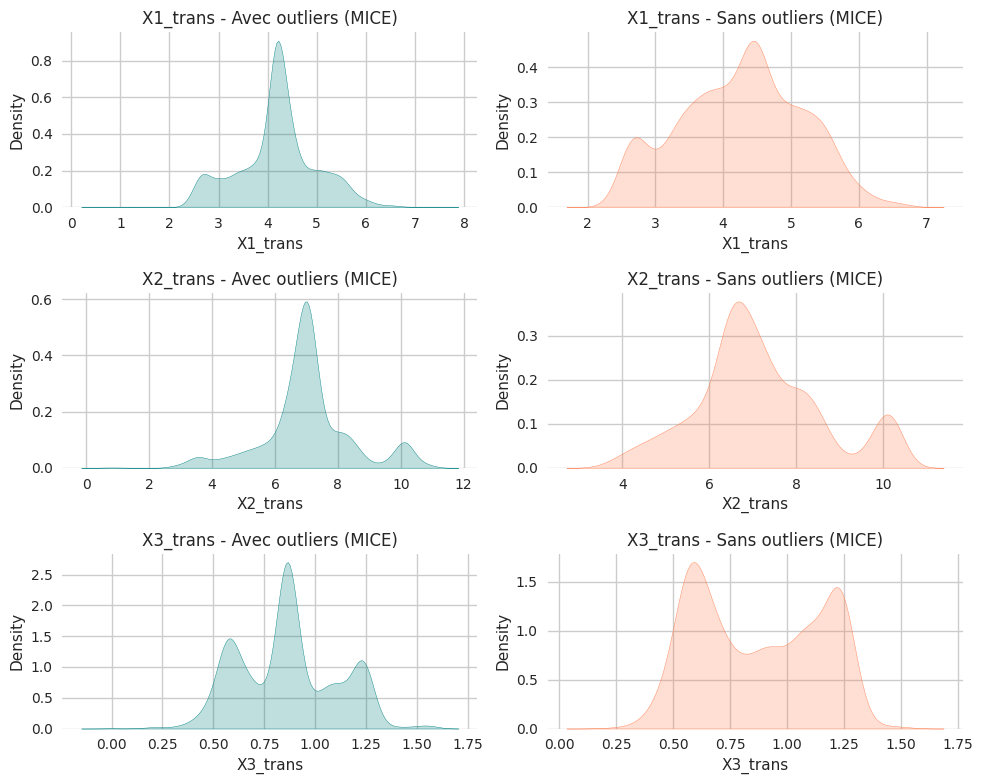

In [57]:
#### Coparaison imputation sur les données avec et sans outliers

# Chargement des deux versions imputées
path_with_outliers = Path("/content/drive/MyDrive/projet_sta211/data/processed/df_imputed_mice.csv")
path_no_outliers = Path("/content/drive/MyDrive/projet_sta211/data/processed/df_imputed_mice_no_outliers.csv")

df_with_outliers = pd.read_csv(path_with_outliers)
df_no_outliers = pd.read_csv(path_no_outliers)

# Variables à comparer
cols_to_plot = ["X1_trans", "X2_trans", "X3_trans"]

# Création des graphiques
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

for i, col in enumerate(cols_to_plot):
    sns.kdeplot(df_with_outliers[col], ax=axes[i, 0], fill=True, color="teal")
    axes[i, 0].set_title(f"{col} - Avec outliers (MICE)")

    sns.kdeplot(df_no_outliers[col], ax=axes[i, 1], fill=True, color="coral")
    axes[i, 1].set_title(f"{col} - Sans outliers (MICE)")

plt.tight_layout()
plt.show()


### 5.3.4 Imputation par KNN

🔍 Recherche du k optimal pour KNN Imputer (avec outliers)
🔍 Recherche k optimal KNN - Variables: 3
   Échantillon: 1000/2459 observations
   Valeurs masquées: 10.0%


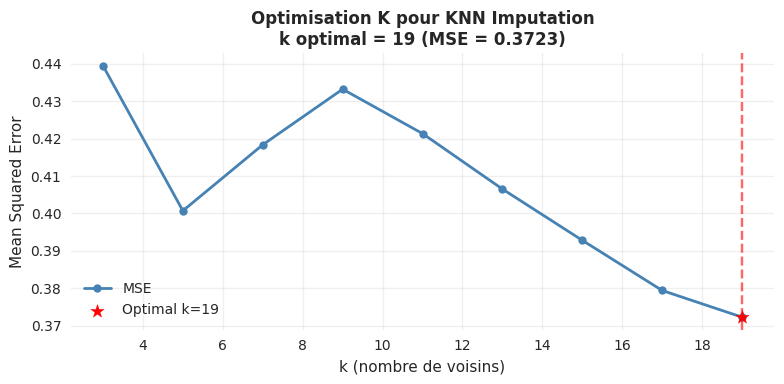

✅ k optimal trouvé: 19 (MSE: 0.3723)
   9/9 valeurs k testées avec succès
✅ k optimal déterminé : 19


In [58]:
### 5.3.4 Imputation par KNN <a id="imputation-knn"></a>

from pathlib import Path
from preprocessing.missing_values import handle_missing_values, find_optimal_k

# 📁 Chemins de sauvegarde
save_path_knn_with = Path(OUTPUTS_DIR) / "data" / "df_imputed_with_outliers_knn.csv"
save_path_knn_no = Path(OUTPUTS_DIR) / "data" / "df_imputed_no_outliers_knn.csv"

# 🔍 Recherche du k optimal pour KNN (avec outliers)
print("🔍 Recherche du k optimal pour KNN Imputer (avec outliers)")
features = ['X1_trans', 'X2_trans', 'X3_trans']
df_knn_sample = df_with_outliers[features].copy()





optimal_k = find_optimal_k(
    data=df_knn_sample,
    continuous_cols=['X1_trans', 'X2_trans', 'X3_trans'],
    k_range=range(3, 21, 2),  # Commencer à 3
    missing_rate=0.1,         # Plus conservateur que 0.2
    cv_folds=3               # Plus rapide
)


print(f"✅ k optimal déterminé : {optimal_k}")

In [59]:

# ✅ Imputation sur les données avec outliers
df_with_outliers_imputed_knn = handle_missing_values(
    df=df_with_outliers,
    strategy="mixed_mar_mcar",
    mar_method='knn',
    knn_k=optimal_k,
    mar_cols=features,
    mcar_cols=[],
    processed_data_dir=save_path_knn_with.parent,
    save_results=True,
    display_info=True
)


🔧 Début de l'imputation des valeurs manquantes
📊 Valeurs manquantes initiales: 2026
📊 Variables MAR à imputer: 3
   • Total valeurs manquantes: 0
✅ Imputation knn appliquée sur 3 colonnes MAR

📊 Résumé de l'imputation:
   • Valeurs manquantes avant: 2026
   • Valeurs manquantes après: 2026
   • Valeurs imputées: 0
⚠️ Valeurs manquantes restantes dans: ['X1', 'X2', 'X3']
💾 Données imputées sauvegardées: /content/drive/MyDrive/projet_sta211/outputs/data/df_imputed_knn_k19.csv
✅ Imputation terminée avec succès



🔍 Recherche du k optimal pour KNN Imputer (sans outliers)
🔍 Recherche k optimal KNN - Variables: 3
   Échantillon: 1000/1684 observations
   Valeurs masquées: 10.0%


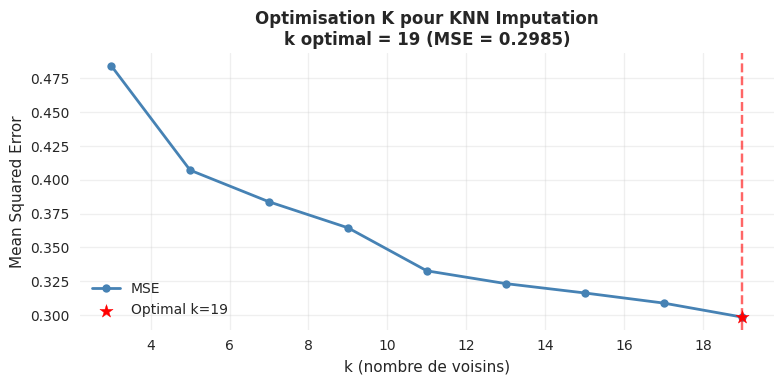

✅ k optimal trouvé: 19 (MSE: 0.2985)
   9/9 valeurs k testées avec succès
✅ k optimal déterminé (sans outliers) : 19


In [60]:
# 🔍 Recherche du k optimal pour KNN (pour les données sans outliers)
print("\n🔍 Recherche du k optimal pour KNN Imputer (sans outliers)")
features = ['X1_trans', 'X2_trans', 'X3_trans']
df_knn_no_outliers = df_study[features].copy()

optimal_k_no_outliers = find_optimal_k(
    data=df_knn_no_outliers,
    continuous_cols=['X1_trans', 'X2_trans', 'X3_trans'],
    k_range=range(3, 21, 2),  # Commencer à 3
    missing_rate=0.1,         # Plus conservateur que 0.2
    cv_folds=3               # Plus rapide
)
print(f"✅ k optimal déterminé (sans outliers) : {optimal_k_no_outliers}")


Avec ou sans outliers on obtient un k optimal de 19. Dans le pipeline final on utilisera alors k=19 pour imputer les données par la méthode KNN.

In [61]:
# ✅ Imputation sans outliers
df_no_outliers_imputed_knn = handle_missing_values(
    df=df_study,
    strategy="mixed_mar_mcar",
    mar_method='knn',
    knn_k=optimal_k_no_outliers,
    mar_cols=features,
    mcar_cols=[],
    processed_data_dir=save_path_knn_no.parent,
    save_results=True,
    display_info=True
)


🔧 Début de l'imputation des valeurs manquantes
📊 Valeurs manquantes initiales: 0
📊 Variables MAR à imputer: 3
   • Total valeurs manquantes: 0
✅ Imputation knn appliquée sur 3 colonnes MAR

📊 Résumé de l'imputation:
   • Valeurs manquantes avant: 0
   • Valeurs manquantes après: 0
   • Valeurs imputées: 0
💾 Données imputées sauvegardées: /content/drive/MyDrive/projet_sta211/outputs/data/df_imputed_knn_k19.csv
✅ Imputation terminée avec succès


## 5.4 Détection et traitement des variables collinéaires <a id="detection-et-traitement-des-variables-collineaires"></a>

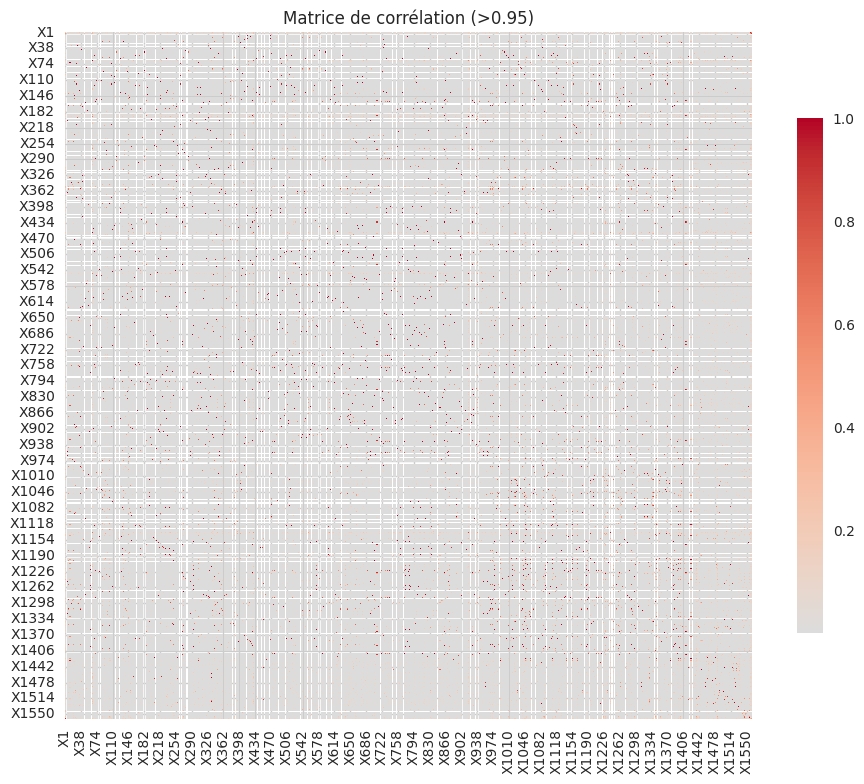

✅ Figure sauvegardée : /content/drive/MyDrive/projet_sta211/outputs/figures/eda/correlation_heatmap_collinearity.png
🔗 796 groupes détectés
❌ 2976 variables à supprimer


In [62]:
## 5.4 Détection et traitement des variables collinéaires <a id="detection-et-traitement-des-variables-collineaires"></a>

from preprocessing.final_preprocessing import find_highly_correlated_groups

correlated_info = find_highly_correlated_groups(
    df=df_study,
    threshold=0.95,
    exclude_cols=['y', 'X4'],
    show_plot=True,
    save_path=FIGURES_DIR / "eda" / "correlation_heatmap_collinearity.png"
)

print(f"🔗 {len(correlated_info['groups'])} groupes détectés")
print(f"❌ {len(correlated_info['to_drop'])} variables à supprimer")




### 5.4.1 Suppression des variables collinéaires <a id="suppression-collineaires"></a>

In [63]:
print("🧹 Suppression des variables fortement corrélées")
print("=" * 60)

from preprocessing.final_preprocessing import apply_collinearity_filter


print("Suppression pour les données imputées par MICE")

print("DONNEES AVEC OUTLIERS")
df_with_outliers_filtered = apply_collinearity_filter(
    df=df_with_outliers_imputed_mice,
    cols_to_drop=correlated_info['to_drop'],
    display_info=True
)


print("DONNEES SANS OUTLIERS")
df_no_outliers_filtered = apply_collinearity_filter(
    df=df_no_outliers_imputed_mice,
    cols_to_drop=correlated_info['to_drop'],
    display_info=True
)



print("Suppression des variables fortement corrélées pour les données imputées par KNN")

print("DONNEES AVEC OUTLIERS")

df_with_outliers_filtered_knn = apply_collinearity_filter(
    df=df_with_outliers_imputed_knn,
    cols_to_drop=correlated_info['to_drop'],
    display_info=True
)


print("DONNEES SANS OUTLIERS")
df_no_outliers_filtered_knn = apply_collinearity_filter(
    df=df_no_outliers_imputed_knn,
    cols_to_drop=correlated_info['to_drop'],
    display_info=True
)

# 🔍 Vérification des dimensions
print(f"\n📊 Dimensions après suppression (MICE - avec outliers)     : {df_with_outliers_filtered.shape}")
print(f"📊 Dimensions après suppression (MICE - sans outliers)     : {df_no_outliers_filtered.shape}")
print(f"📊 Dimensions après suppression (KNN  - avec outliers)     : {df_with_outliers_filtered_knn.shape}")
print(f"📊 Dimensions après suppression (KNN  - sans outliers)     : {df_no_outliers_filtered_knn.shape}")



🧹 Suppression des variables fortement corrélées
Suppression pour les données imputées par MICE
DONNEES AVEC OUTLIERS
✅ Colonnes supprimées : 2976
📏 Dimensions finales : (2459, 764)
🛡️ X4 : ✅
DONNEES SANS OUTLIERS
✅ Colonnes supprimées : 2976
📏 Dimensions finales : (1684, 764)
🛡️ X4 : ✅
Suppression des variables fortement corrélées pour les données imputées par KNN
DONNEES AVEC OUTLIERS
✅ Colonnes supprimées : 2976
📏 Dimensions finales : (2459, 764)
🛡️ X4 : ✅
DONNEES SANS OUTLIERS
✅ Colonnes supprimées : 2976
📏 Dimensions finales : (1684, 764)
🛡️ X4 : ✅

📊 Dimensions après suppression (MICE - avec outliers)     : (2459, 764)
📊 Dimensions après suppression (MICE - sans outliers)     : (1684, 764)
📊 Dimensions après suppression (KNN  - avec outliers)     : (2459, 764)
📊 Dimensions après suppression (KNN  - sans outliers)     : (1684, 764)


In [64]:
df_no_outliers_filtered_knn.head(3)

,X1,X2,X3,X4,X5,X6,X10,X11,X12,X13,X14,X17,X19,X20,X21,X23,X25,X27,X29,X30,X31,X32,X33,X34,X39,X40,X46,X51,X57,X62,X63,X64,X76,X77,X78,X79,X83,X87,X91,X93,X94,X100,X101,X102,X103,X104,X105,X106,X107,X112,X113,X114,X116,X117,X119,X121,X123,X124,X125,X126,X127,X128,X132,X134,X135,X137,X140,X141,X142,X146,X147,X148,X149,X150,X151,X155,X158,X160,X163,X165,X166,X167,X171,X172,X173,X174,X175,X176,X177,X179,X180,X181,X184,X185,X186,X187,X188,X192,X193,X196,X197,X204,X206,X207,X208,X209,X213,X216,X220,X222,X224,X227,X229,X232,X236,X238,X240,X242,X243,X244,X245,X246,X247,X251,X252,X253,X254,X256,X259,X260,X262,X265,X266,X267,X270,X272,X273,X274,X276,X278,X279,X280,X281,X282,X283,X284,X285,X286,X290,X291,X293,X295,X296,X298,X299,X301,X302,X306,X309,X315,X316,X318,X319,X320,X331,X336,X338,X341,X344,X345,X347,X352,X354,X355,X357,X358,X361,X362,X363,X364,X366,X369,X370,X371,X372,X374,X375,X376,X378,X380,X381,X382,X383,X386,X387,X388,X389,X391,X392,X393,X394,X398,X399,X400,X406,X407,X414,X415,X418,X419,X421,X422,X424,X425,X429,X430,X434,X435,X436,X439,X442,X448,X455,X456,X457,X458,X460,X462,X463,X464,X465,X466,X467,X468,X470,X473,X474,X475,X476,X477,X479,X482,X484,X485,X486,X487,X488,X490,X495,X496,X497,X501,X503,X507,X509,X510,X521,X522,X524,X526,X531,X532,X537,X543,X544,X546,X550,X553,X555,X559,X562,X564,X565,X567,X568,X570,X574,X576,X578,X579,X581,X582,X583,X585,X591,X596,X602,X603,X607,X609,X610,X623,X625,X626,X627,X628,X629,X630,X631,X633,X637,X638,X639,X641,X643,X644,X645,X650,X651,X652,X653,X656,X657,X662,X664,X665,X668,X671,X673,X677,X683,X686,X693,X695,X701,X706,X719,X722,X735,X738,X745,X746,X748,X749,X755,X771,X778,X783,X785,X786,X789,X793,X801,X810,X815,X820,X832,X835,X840,X848,X849,X861,X863,X870,X875,X882,X889,X893,X894,X905,X910,X923,X924,X929,X934,X941,X942,X946,X948,X949,X951,X952,X955,X958,X967,X969,X973,X975,X978,X980,X981,X984,X988,X989,X990,X992,X993,X998,X999,X1000,X1001,X1002,X1003,X1004,X1005,X1006,X1007,X1008,X1009,X1010,X1011,X1012,X1013,X1014,X1015,X1016,X1017,X1018,X1019,X1020,X1022,X1023,X1024,X1025,X1026,X1028,X1029,X1030,X1033,X1034,X1035,X1036,X1038,X1039,X1041,X1042,X1047,X1048,X1050,X1051,X1052,X1053,X1054,X1055,X1057,X1058,X1059,X1060,X1062,X1063,X1064,X1065,X1067,X1069,X1070,X1071,X1072,X1073,X1075,X1078,X1079,X1080,X1081,X1082,X1083,X1084,X1085,X1086,X1087,X1088,X1089,X1090,X1091,X1092,X1094,X1095,X1096,X1097,X1098,X1099,X1102,X1103,X1104,X1108,X1110,X1112,X1113,X1114,X1115,X1116,X1117,X1118,X1120,X1122,X1123,X1124,X1125,X1126,X1127,X1128,X1130,X1133,X1134,X1135,X1137,X1138,X1139,X1141,X1142,X1143,X1144,X1145,X1146,X1148,X1149,X1151,X1152,X1153,X1154,X1159,X1160,X1161,X1162,X1164,X1165,X1167,X1168,X1169,X1170,X1173,X1175,X1180,X1182,X1183,X1185,X1190,X1192,X1193,X1194,X1195,X1197,X1198,X1203,X1204,X1206,X1207,X1208,X1211,X1212,X1213,X1214,X1215,X1217,X1220,X1222,X1223,X1225,X1227,X1228,X1229,X1230,X1231,X1234,X1237,X1238,X1239,X1240,X1242,X1243,X1244,X1245,X1247,X1248,X1249,X1250,X1251,X1253,X1254,X1255,X1256,X1257,X1263,X1264,X1265,X1266,X1268,X1269,X1272,X1274,X1275,X1277,X1279,X1282,X1286,X1287,X1292,X1293,X1294,X1299,X1300,X1301,X1302,X1303,X1305,X1307,X1315,X1316,X1319,X1327,X1329,X1330,X1331,X1333,X1334,X1336,X1337,X1340,X1341,X1342,X1343,X1345,X1348,X1351,X1352,X1353,X1354,X1357,X1359,X1360,X1363,X1364,X1365,X1367,X1369,X1371,X1372,X1377,X1379,X1380,X1381,X1383,X1387,X1393,X1397,X1400,X1403,X1404,X1405,X1406,X1407,X1408,X1409,X1410,X1414,X1416,X1418,X1420,X1421,X1422,X1426,X1427,X1429,X1430,X1431,X1432,X1433,X1434,X1435,X1436,X1437,X1438,X1439,X1440,X1441,X1442,X1443,X1445,X1446,X1447,X1448,X1450,X1451,X1452,X1453,X1454,X1455,X1459,X1460,X1462,X1463,X1464,X1465,X1466,X1468,X1469,X1470,X1471,X1472,X1473,X1474,X1475,X1476,X1477,X1478,X1480,X1481,X1482,X1483,X1484,X1485,X1486,X1488,X1489,X1490,X1491,X1492,X1493,X1494,X1495,X1496,X1498,X1499,X1501,X1502,X1503,X1504,X1505,X1508,X1509,X1510,X1511,X1512,X1514,X1515,X1516,X1517,X1519,X1520,X1522,X1523,X1527,X1528,X1529,X1530,X1531,X1532,X1533,X1534,X1535,X

### 5.4.2 Sauvegarde des datasets filtrés <a id="sauvegarde-datasets-filtres"></a>


In [65]:
### 5.4.2 Sauvegarde des datasets filtrés <a id="sauvegarde-datasets-filtres"></a>
print("💾 Sauvegarde des jeux de données filtrés")
print("=" * 60)

from pathlib import Path

# ✅ Définition du dossier de sauvegarde
filtered_dir = DATA_PROCESSED
filtered_dir.mkdir(parents=True, exist_ok=True)

# === Sauvegarde des versions imputées par MICE ===
mice_with_path = filtered_dir / "df_filtered_with_outliers_mice.csv"
mice_no_path   = filtered_dir / "df_filtered_no_outliers_mice.csv"

df_with_outliers_filtered.to_csv(mice_with_path, index=False)
df_no_outliers_filtered.to_csv(mice_no_path, index=False)

print(f"✅ Fichier sauvegardé : {mice_with_path}")
print(f"✅ Fichier sauvegardé : {mice_no_path}")

# === Sauvegarde des versions imputées par KNN ===
knn_with_path = filtered_dir / "df_filtered_with_outliers_knn.csv"
knn_no_path   = filtered_dir / "df_filtered_no_outliers_knn.csv"

df_with_outliers_filtered_knn.to_csv(knn_with_path, index=False)
df_no_outliers_filtered_knn.to_csv(knn_no_path, index=False)

print(f"✅ Fichier sauvegardé : {knn_with_path}")
print(f"✅ Fichier sauvegardé : {knn_no_path}")



💾 Sauvegarde des jeux de données filtrés
✅ Fichier sauvegardé : /content/drive/MyDrive/projet_sta211/data/processed/df_filtered_with_outliers_mice.csv
✅ Fichier sauvegardé : /content/drive/MyDrive/projet_sta211/data/processed/df_filtered_no_outliers_mice.csv
✅ Fichier sauvegardé : /content/drive/MyDrive/projet_sta211/data/processed/df_filtered_with_outliers_knn.csv
✅ Fichier sauvegardé : /content/drive/MyDrive/projet_sta211/data/processed/df_filtered_no_outliers_knn.csv


# 6. Construction des datasets finaux <a id="construction-des-datasets-finaux"></a>

In [66]:
# 1. Vérification des modules
from preprocessing import print_module_status, check_essential_functions

# print_module_status()
# check_essential_functions()

# 2. Test du pipeline sécurisé
from preprocessing import prepare_dataset_safe, prepare_final_dataset

df = prepare_dataset_safe("data_train.csv")
print(f"✅ Pipeline réussi ! Shape: {df.shape}")

# 3. Test complet
from preprocessing import run_comprehensive_test

results = run_comprehensive_test("data_train.csv")
print("🧪 Test complet terminé !")

📦 MODULES DE PRÉTRAITEMENT STA211
🔧 Version: 2.1
📊 Fonctions disponibles: 54

📋 Statut des modules:
  ✅ Pipeline principal: Disponible
  ✅ Nouvelles fonctions (v2.1): Disponible
  ✅ Chargement de données: Disponible
  ✅ Valeurs manquantes: Disponible
  ✅ Détection outliers: Disponible
  ✅ Génération datasets: Disponible
  ✅ Inspection colonnes: Disponible
  ✅ Comparaison méthodes: Disponible
  ✅ Pipeline legacy: Disponible
🔍 VÉRIFICATION DES FONCTIONS ESSENTIELLES
✅ prepare_final_dataset
✅ load_data
✅ handle_missing_values

✅ Toutes les fonctions essentielles (3) sont disponibles
🔒 PIPELINE SÉCURISÉ - VERSION CORRIGÉE
🔄 DÉMARRAGE DU PIPELINE DE PRÉTRAITEMENT (VERSION CORRIGÉE)
📂 Étape 1: Chargement des données...
✅ Colonne 'outcome' encodée en numérique (ad. → 1, noad. → 0)

✅ Fichier chargé : /content/drive/MyDrive/projet_sta211/data/raw/data_train.csv
🔢 Dimensions : (2459, 1559)
📋 Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

✅ Après chargement: X4 présente et correcte (valeurs: [np.float64(0.0), np.float64(1.0)])

🔧 Étape 2: Conversion de X4...
✅ Colonne 'X4' convertie en Int64 (binaire).
✅ Après conversion X4: X4 présente et correcte (valeurs: [np.int64(0), np.int64(1)])

🔄 Étape 3: Transformation Yeo-Johnson (X1, X2, X3)...
✅ Après Yeo-Johnson: X4 présente et correcte (valeurs: [np.int64(0), np.int64(1)])

🔧 Étape 4: Imputation des valeurs manquantes (knn)...
🔧 Début de l'imputation des valeurs manquantes
📊 Valeurs manquantes initiales: 2037
📊 Variables MAR à imputer: 3
   • Total valeurs manquantes: 2026
   • X1_trans: 674 valeurs manquantes
   • X2_trans: 673 valeurs manquantes
   • X3_trans: 679 valeurs manquantes
⚠️ k non spécifié, utilisation de k = 5 par défaut.
✅ Imputation knn appliquée sur 3 colonnes MAR
✅ X4: 11 valeurs imputées par médiane (1.0000)

📊 Résumé de l'imputation:
   • Valeurs manquantes avant: 2037
   • Valeurs manquantes après: 0
   • Valeurs imputées: 2037
✅ Imputation terminée a

In [70]:
import importlib
import final_preprocessing

# Forcer le rechargement
importlib.reload(final_preprocessing)

# Vérifier la version
print(f"Version: {getattr(final_preprocessing, '__version__', 'Inconnue')}")

# Test
df_final = final_preprocessing.prepare_final_dataset("data_train.csv")

Version: Inconnue

✅ Fichier chargé : /content/drive/MyDrive/projet_sta211/data/raw/data_train.csv
🔢 Dimensions : (2459, 1559)
📋 Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entries, X1 to outcome
dtypes: float64(4), int64(1554), object(1)
memory usage: 29.3+ MB

🔎 Premières lignes :


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

⚠️ k non spécifié, utilisation de k = 5 par défaut.
✅ Imputation knn appliquée sur : ['X1_trans', 'X2_trans', 'X3_trans']
→ Médiane imputée pour X4 : 1.0000


TypeError: list indices must be integers or slices, not str

In [69]:
from final_preprocessing import prepare_final_dataset

print("🏗️ Construction des datasets finaux pour la modélisation")
print("=" * 70)
# Utilisation normale (compatible avec votre code existant)
df_final_knn_with_outliers = prepare_final_dataset(
    file_path="data_train.csv",
    strategy="mixed_mar_mcar",
    mar_method="knn",
    correlation_threshold=0.95,
    display_info=True,
    #verbose_correlation=True
)


🏗️ Construction des datasets finaux pour la modélisation

✅ Fichier chargé : /content/drive/MyDrive/projet_sta211/data/raw/data_train.csv
🔢 Dimensions : (2459, 1559)
📋 Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entries, X1 to outcome
dtypes: float64(4), int64(1554), object(1)
memory usage: 29.3+ MB

🔎 Premières lignes :


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

⚠️ k non spécifié, utilisation de k = 5 par défaut.
✅ Imputation knn appliquée sur : ['X1_trans', 'X2_trans', 'X3_trans']
→ Médiane imputée pour X4 : 1.0000


TypeError: list indices must be integers or slices, not str

In [ ]:
verify_correlation_removal(df_final, threshold=0.95)

In [ ]:
# 6. Construction des datasets finaux <a id="construction-des-datasets-finaux"></a>

print("🏗️ Construction des datasets finaux pour la modélisation")
print("=" * 70)

# ============================================================================
# IMPORTS DES MODULES
# ============================================================================

from preprocessing.dataset_generator import (
    DatasetGenerator,
    quick_generate_datasets,
    print_generation_summary
)

# ============================================================================
# CONFIGURATION DE LA GÉNÉRATION
# ============================================================================

# 📝 CHOISISSEZ DU FORMAT DE SAUVEGARDE ICI
SAVE_FORMAT = 'both'  # Options: 'parquet', 'csv', ou 'both'

print(f"💾 Format de sauvegarde sélectionné : {SAVE_FORMAT}")

# ============================================================================
# MÉTHODE 1 : GÉNÉRATION RAPIDE (RECOMMANDÉE)
# ============================================================================

print("\n🚀 Génération rapide des datasets avec paramètres par défaut...")

# Génération automatique de tous les datasets
final_datasets = quick_generate_datasets(
    file_path=RAW_DATA_DIR / "data_train.csv",
    data_processed_dir=DATA_PROCESSED,
    models_dir=MODELS_DIR,
    save_format=SAVE_FORMAT,
    random_state=RANDOM_STATE
)

# Affichage du résumé
summary_df = print_generation_summary(final_datasets)

# ============================================================================
# MÉTHODE 2 : GÉNÉRATION PERSONNALISÉE (OPTIONNELLE)
# ============================================================================

# Décommentez cette section si vous voulez personnaliser les paramètres

# print("\n🔧 Génération personnalisée...")

# # Initialisation du générateur
# generator = DatasetGenerator(
#     data_processed_dir=DATA_PROCESSED,
#     models_dir=MODELS_DIR,
#     random_state=RANDOM_STATE
# )

# # Paramètres personnalisés (exemple)
# custom_params = {
#     "correlation_threshold": 0.98,  # Seuil plus strict
#     "display_info": False           # Moins de verbosité
# }

# # Génération avec paramètres personnalisés
# custom_datasets = generator.generate_all_datasets(
#     file_path=RAW_DATA_DIR / "data_train.csv",
#     save_format=SAVE_FORMAT,
#     custom_configs=generator.create_dataset_configs(
#         RAW_DATA_DIR / "data_train.csv",
#         custom_params
#     )
# )

# ============================================================================
# VALIDATION DE LA QUALITÉ
# ============================================================================

print("\n🔍 VALIDATION DE LA QUALITÉ DES DATASETS")
print("-" * 50)

# Utilisation d'un générateur temporaire pour la validation
temp_generator = DatasetGenerator(DATA_PROCESSED, MODELS_DIR, RANDOM_STATE)
validation_report = temp_generator.validate_datasets_quality(final_datasets)

for dataset_name, report in validation_report.items():
    print(f"\n📊 {dataset_name}:")
    if report['status'] == 'success':
        print(f"  ✓ Score qualité : {report['quality_score']:.2f}/1.0")
        checks = report['checks']
        print(f"  ✓ Variable cible présente : {checks['has_target']}")
        print(f"  ✓ Pas de valeurs manquantes : {checks['no_missing_values']}")
        print(f"  ✓ Variables transformées : {checks['has_transformed_vars']}")
        if checks['target_distribution']:
            print(f"  ✓ Distribution cible : {checks['target_distribution']}")
    else:
        print("  ❌ Dataset en erreur")

# ============================================================================
# SAUVEGARDE DE LA CONFIGURATION
# ============================================================================

print(f"\n💾 Sauvegarde de la configuration de génération...")

config_path = temp_generator.save_generation_config(
    datasets=final_datasets,
    save_format=SAVE_FORMAT
)

print(f"✅ Configuration sauvegardée : {config_path}")

# ============================================================================
# ACCÈS AUX DATASETS GÉNÉRÉS
# ============================================================================

print(f"\n📂 ACCÈS AUX DATASETS GÉNÉRÉS")
print("-" * 40)

# Les datasets sont disponibles dans le dictionnaire final_datasets
# Exemples d'utilisation :

print("📌 Exemples d'accès aux données :")
print("# Accès au DataFrame MICE sans outliers :")
print("df_mice_clean = final_datasets['mice_no_outliers']['dataframe']")
print()
print("# Accès au chemin du fichier KNN avec outliers :")
print("path_knn = final_datasets['knn_with_outliers']['primary_path']")
print()
print("# Accès à tous les DataFrames :")
print("dataframes = {name: info['dataframe'] for name, info in final_datasets.items() if info['status'] == 'success'}")

# Création d'un dictionnaire pratique pour la suite
available_dataframes = {
    name: info['dataframe']
    for name, info in final_datasets.items()
    if info['status'] == 'success' and info['dataframe'] is not None
}

print(f"\n✅ {len(available_dataframes)} datasets disponibles pour la modélisation :")
for name in available_dataframes.keys():
    print(f"  • {name}")

print(f"\n✅ Génération des datasets terminée avec succès!")
print(f"📁 Fichiers sauvegardés dans : {DATA_PROCESSED}")

# ============================================================================
# EXPORT POUR LA SUITE DU NOTEBOOK
# ============================================================================

# Variables exportées pour utilisation dans les cellules suivantes
GENERATED_DATASETS = final_datasets
AVAILABLE_DATAFRAMES = available_dataframes
DATASET_SUMMARY = summary_df
VALIDATION_REPORT = validation_report


In [ ]:


# Utilisation des datasets cohérents
AVAILABLE_DATAFRAMES = {
    'mice_with_outliers': pd.read_parquet(DATA_PROCESSED / "final_dataset_mice_with_outliers.parquet"),
    'mice_no_outliers': pd.read_parquet(DATA_PROCESSED / "final_dataset_mice_no_outliers.parquet"),
    'knn_with_outliers': pd.read_parquet(DATA_PROCESSED / "final_dataset_knn_with_outliers.parquet"),
    'knn_no_outliers': pd.read_parquet(DATA_PROCESSED / "final_dataset_knn_no_outliers.parquet")
}

In [ ]:
# Vérification rapide de X4
print("🔍 Vérification de la présence de X4 dans tous les datasets finaux :")
for name, df in AVAILABLE_DATAFRAMES.items():
    has_x4 = 'X4' in df.columns
    print(f"  {name}: {'✅' if has_x4 else '❌'} X4")

    if has_x4:
        # Vérifier que X4 est bien binaire
        unique_vals = sorted(df['X4'].unique())
        print(f"    Valeurs: {unique_vals}, Type: {df['X4'].dtype}")

## 6.1 Comparaison des méthodes d'imputation <a id="comparaison-methodes"></a>

In [ ]:
from preprocessing import run_imputation_comparison

# Lancer toute l’analyse en une ligne
best_method = run_imputation_comparison(GENERATED_DATASETS)
print(f"✅ Méthode d’imputation recommandée : {best_method}")


# 7. Validation du prétraitement <a id="validation-pretraitement"></a>

In [ ]:
print("🔍 Validation du prétraitement")
print("=" * 60)

## 7.1 Vérification de la qualité des données <a id="verification-qualite"></a>

In [ ]:
# 7.1 Vérification de la qualité des données
print("\n📊 Vérification des jeux de données finaux :")

for name, df in AVAILABLE_DATAFRAMES.items():
    print(f"\n🧾 {name}")
    print(f"Shape        : {df.shape}")
    print(f"Colonnes     : {df.columns.tolist()[:5]} ...")
    print(f"Valeurs nulles: {df.isnull().sum().sum()}")

In [ ]:
AVAILABLE_DATAFRAMES["mice_with_outliers"].head(2)

## 7.2 Statistiques finales <a id="statistiques-finales"></a>

In [ ]:
# 7.2 Statistiques finales
print("\n📈 Statistiques descriptives post-prétraitement :")

for name, df in AVAILABLE_DATAFRAMES.items():
    print(f"\n📊 Dataset: {name}")
    print(df.describe().T[['mean', 'std', 'min', 'max']].round(2))


# 8. Conclusion <a id="conclusion"></a>
print("\n✅ CONCLUSION DU PRÉTRAITEMENT")
print("=" * 60)

print("""
🎯 Le processus de prétraitement des données est désormais terminé avec succès.

🧩 Étapes réalisées :
- Nettoyage et standardisation de la cible
- Analyse complète de la structure du dataset
- Transformation Yeo-Johnson des variables continues
- Détection et suppression des outliers
- Imputation multivariée (KNN et MICE) avec validation croisée
- Réduction de la colinéarité
- Génération automatique des datasets finaux

📦 Datasets finaux disponibles :
- MICE avec et sans outliers
- KNN avec et sans outliers

✅ Prêt pour la phase de modélisation supervisée avec évaluation du F1-score.
""")
